# Data 422 - Data Wrangling, S2 2023

## Final Project - Fisheries New Zealand

Last updated: 27 October, 2023

This notebook will guide you through our methods. There are annotations to guide you through our thought process.

In [155]:
#importing all needed libraries

library(tidyverse)
library(stringr)
library(readr)
library(dplyr)
library(skimr)
library(knitr)
library(visdat)
library(rvest)
library(ggplot2)

## Scraping the first dataset - Fish catch data in NZ.

source - https://fs.fish.govt.nz/Page.aspx?pk=6&tk=97

This data comes from the Ministry of Primary Industries (MPI) website.

There's no option to directly download the data, so we are scraping it.

The time period of this data is form 2018 - 2022.

This table has the following columns - 
- SpeciesCode
- SpeciesName
- Reported commercial catch in kgs
- Total allowable commercial catch in kgs
- Customary allowance in kgs (allowed catch for customary fishers)
- Recreational allowance in kgs (allowed catch for recreational fishers)


We have defined a function called `scrape_and_store_data` which scrapes data from the web pages and stores it in a dictionary. It works like this-
1. There is a base URL defined
2. There is a list of years called `year_list` for which we want to scrape data.
3. There is an empty dictionary, which will store scraped data. They key will be the year, and the value will be the data for that year.
4. We pass a list of years to this function. The function adds the year to the base URL, goes to the webpage, and scrapes the data table. Then it stores that data in the dictionary, and returns it to us.
5. We save this returned dictionary in `catch_data_dict`. This dictionary can now be used to access the fish-catch data of any year.

In [2]:
# the base URL
base_url <- "https://fs.fish.govt.nz/Page.aspx?pk=6&tk=97&ey="



# defining a function which will loop through a list of years, scrape data from the URLS and fill the dictionary with data
scrape_and_store_data <- function(year_list) {
  
    dict <- list()
    
  for (year in year_list) {
      
      url <- paste0(base_url, year)

    # Read the HTML content from the URL
    webpage <- read_html(url)

    # Select the table using the appropriate CSS selector
    table <- html_nodes(webpage, "#ctl00_ContentPlaceHolder2_ctl00_gv") %>%
        html_table()
    
    value <- table
    key <- year
    dict[key] <- value
      }
  return(dict)
}



year_list <- c("2018","2019", "2020", "2021", "2022")

# calling the function to fill the dictionary
catch_data_dict <- scrape_and_store_data(year_list)


In [ ]:
# extracting all individual tables from the dictionary

catch_2018 = catch_data_dict[['2018']]
catch_2019 = catch_data_dict[['2019']]
catch_2020 = catch_data_dict[['2020']]
catch_2021 = catch_data_dict[['2021']]
catch_2022 = catch_data_dict[['2022']]

In [182]:
# checking 2018 data

head(catch_2018, 10)

Species Code Name                    Reported comm. catch (kg) TACC (kg)  
1  HOK          Hoki                    135,418,710               150,010,000
2  JMA          Jack mackerel           45,301,545                51,327,214 
3  BAR          Barracouta              29,071,106                33,402,461 
4  SQU          Arrow squid             23,072,693                82,120,281 
5  LIN          Ling                    18,694,281                23,192,000 
6  SBW!         Southern blue whitin... 15,626,254                49,583,000 
7  EMA          Blue mackerel           11,399,659                11,550,000 
8  OYU          Oysters, dredge (Fov... 9,905,321                 14,950,000 
9  OEO          Oreo                    8,783,204                 14,860,000 
10 SWA          Silver warehou          8,655,435                 10,380,201 
   Cust. allow. (kg) Rec. allow. (kg) Target fishery Bycatch fishery
1  20,000            20,000           Yes            Yes            
2  20,000            20,000           Yes            Yes            
3  2,000             3,000            Yes            Yes            
4  10,000            10,000           Yes            No             
5  22,000            42,000           Yes            Yes            
6  0                 0                Yes            No             
7  24,000            47,000           Yes            Yes            
8                                     Yes            No             
9  0                 0                                              
10 1,000             2,000            No             Yes            
   In QMS\r\n\r\n                YesNo
1  Yes                                
2  Yes                                
3  Yes                                
4  Yes                                
5  Yes                                
6  Yes                                
7  Yes                                
8  Yes                                
9  Yes                                
10 Yes

In [183]:
#checking the 2019 data

sample_n(catch_2019, 10)

Species Code Name              Reported comm. catch (kg) TACC (kg)
1  PAI          Blackfoot paua                                       
2  JMM          Murphy's mackerel                                    
3  ECK          Ecklonia          2                                  
4  GSP          Pale ghost shark  840,551                   1,780,000
5  PPI          Pipi                                        204,000  
6  RCO          Red cod           2,912,434                 8,278,367
7  LES          Lessonia          0                                  
8  QSC          Queen scallop     12,168                    380,000  
9  RBT          Redbait           2,673,606                 5,050,000
10 TRE          Trevally          3,089,687                 3,933,103
   Cust. allow. (kg) Rec. allow. (kg) Target fishery Bycatch fishery
1                                                                   
2                                                                   
3                                                                   
4  0                 0                No             Yes            
5  242,000           242,000                                        
6  10,000            119,000          Yes            No             
7                                                                   
8  0                 0                Yes            No             
9  0                 0                                              
10 1,000             100,000          Yes            Yes            
   In QMS\r\n\r\n                YesNo Year
1  Yes                                 2019
2  Yes                                 2019
3  No                                  2019
4  Yes                                 2019
5  Yes                                 2019
6  Yes                                 2019
7  No                                  2019
8  Yes                                 2019
9  Yes                                 2019
10 Yes                                 2019

In [1046]:
#checking the 2021 data

tail(catch_2021, 10)

Species Code Name             Reported comm. catch (kg) TACC (kg)
1  GRA          Gracilaria weed                                     
2  GRP          Grass carp                                          
3  HSI          Jack-knife prawn                                    
4  KOU          Koura                                               
5  POY          Pacific oyster                                      
6  PRP          Porphyra                                            
7  ULV          Sea lettuce                                         
8  SOS          Sockeye salmon                                      
9  STM          Striped marlin                                      
10 WHI          Whitebait                                           
   Cust. allow. (kg) Rec. allow. (kg) Target fishery Bycatch fishery
1                                                                   
2                                                                   
3                                                                   
4                                                                   
5                                                                   
6                                                                   
7                                                                   
8                                                                   
9                                     No             Yes            
10                                                                  
   In QMS\r\n\r\n                YesNo Year
1  No                                  2021
2  No                                  2021
3  No                                  2021
4  No                                  2021
5  No                                  2021
6  No                                  2021
7  No                                  2021
8  No                                  2021
9  No                                  2021
10 No                                  2021

### Tidying and cleaning the fish-catch data

1. Firstly, as we just saw above, the last row of these tables contains the 'total' value. We don't need this, so we can remove these last rows.
2. Adding year information to all fish-catch data in the column `Year`.
3. Combining all fish-catch data into one big tibble.

In [192]:
# removing the last rows from each table

catch_2018 <- catch_2018[-nrow(catch_2018), ]
catch_2019 <- catch_2019[-nrow(catch_2019), ]
catch_2020 <- catch_2020[-nrow(catch_2020), ]
catch_2021 <- catch_2021[-nrow(catch_2021), ]
catch_2022 <- catch_2022[-nrow(catch_2022), ]

In [193]:
# now we need to add 'year' information as a new column to each dataframe

catch_2018$Year <- 2018
catch_2019$Year <- 2019
catch_2020$Year <- 2020
catch_2021$Year <- 2021
catch_2022$Year <- 2022

In [204]:
# combining all fish-catch data into one big tibble.

catch_all_years <- bind_rows(catch_2018, catch_2019, catch_2020, catch_2021, catch_2022)

In [205]:
sample_n(catch_all_years, 15)

Species Code Name                    Reported comm. catch (kg) TACC (kg) 
1  NSD          Northern spiny dogfi... 27,044                              
2  JMM          Murphy's mackerel                                           
3  ELE          Elephant fish           1,359,310                 1,463,700 
4  ESO          NZ sole                                                     
5  SFL          Sand flounder                                               
6  GLM          Green-lipped mussel     151,920                   1,720,000 
7  BAR          Barracouta              22,804,391                33,402,461
8  PRP          Porphyra                                                    
9  ECK          Ecklonia                2                                   
10 STA          Giant stargazer         2,840,125                 5,536,400 
11 SPR          Sprats                  3                         450,000   
12 FLA          Flatfish                1,911,478                 5,121,500 
13 PAI          Blackfoot paua                                              
14 PTE          Agar weed               2,032                               
15 SPO          Rig                     1,376,137                 2,018,064 
   Cust. allow. (kg) Rec. allow. (kg) Target fishery Bycatch fishery
1                                                                   
2                                                                   
3  15,000            30,000           No             Yes            
4                                                                   
5                                                                   
6  467,000           310,000          Yes            No             
7  2,000             3,000            Yes            Yes            
8                                                                   
9                                                                   
10 2,000             6,000            Yes            Yes            
11 22,000            43,000           No             Yes            
12 55,000            177,000          Yes            No             
13                                                                  
14                                                                  
15 91,000            188,000          Yes            Yes            
   In QMS\r\n\r\n                YesNo Year
1  No                                  2021
2  Yes                                 2019
3  Yes                                 2020
4  Yes                                 2021
5  Yes                                 2022
6  Yes                                 2018
7  Yes                                 2020
8  No                                  2018
9  No                                  2019
10 Yes                                 2019
11 Yes                                 2019
12 Yes                                 2020
13 Yes                                 2019
14 No                                  2022
15 Yes                                 2020

In [206]:
# looking at the data and the column datatypes to see if any changes are needed

glimpse(catch_all_years)

Rows: 847
Columns: 10
$ `Species Code`                        <chr> "HOK", "JMA", "BAR", "SQU", "LIN…
$ Name                                  <chr> "Hoki", "Jack mackerel", "Barrac…
$ `Reported comm. catch (kg)`           <chr> "135,418,710", "45,301,545", "29…
$ `TACC (kg)`                           <chr> "150,010,000", "51,327,214", "33…
$ `Cust. allow. (kg)`                   <chr> "20,000", "20,000", "2,000", "10…
$ `Rec. allow. (kg)`                    <chr> "20,000", "20,000", "3,000", "10…
$ `Target fishery`                      <chr> "Yes", "Yes", "Yes", "Yes", "Yes…
$ `Bycatch fishery`                     <chr> "Yes", "Yes", "Yes", "No", "Yes"…
$ `In QMS\r\n\r\n                YesNo` <chr> "Yes", "Yes", "Yes", "Yes", "Yes…
$ Year                                  <dbl> 2018, 2018, 2018, 2018, 2018, 20…


#### Changes to be made-

1. The columns can be renamed and the whitespaces should be removed so that it's easier to type column names
2. The catch quantities need to be changed from type \<chr> to \<dbl> and the commas should be removed from the numbers.
3. The target fishery, bycatch fishery, and 'In QMS' need to be changed to type 'factor'.
4. The 'Year' column should be of type \<factor>.


In [207]:
# STEP 1 - renaming the columns

catch_all_years <- catch_all_years %>%
              rename(
                SpeciesCode = `Species Code`,
                SpeciesName = `Name`,
                ReportedCatch = `Reported comm. catch (kg)`,
                TACC = 'TACC (kg)',
                CustomaryAllowance = 'Cust. allow. (kg)',
                RecreationalAllowance = 'Rec. allow. (kg)',
                TargetFishery = `Target fishery`,
                BycatchFishery = `Bycatch fishery`,
                InQMS = 'In QMS\r\n\r\n                YesNo',
                Year = 'Year',
              )


#reordering the columns

catch_all_years <- catch_all_years %>%
                select(Year, everything()) 

In [208]:
head(catch_all_years)

Year SpeciesCode SpeciesName             ReportedCatch TACC       
1 2018 HOK         Hoki                    135,418,710   150,010,000
2 2018 JMA         Jack mackerel           45,301,545    51,327,214 
3 2018 BAR         Barracouta              29,071,106    33,402,461 
4 2018 SQU         Arrow squid             23,072,693    82,120,281 
5 2018 LIN         Ling                    18,694,281    23,192,000 
6 2018 SBW!        Southern blue whitin... 15,626,254    49,583,000 
  CustomaryAllowance RecreationalAllowance TargetFishery BycatchFishery InQMS
1 20,000             20,000                Yes           Yes            Yes  
2 20,000             20,000                Yes           Yes            Yes  
3 2,000              3,000                 Yes           Yes            Yes  
4 10,000             10,000                Yes           No             Yes  
5 22,000             42,000                Yes           Yes            Yes  
6 0                  0                     Yes           No             Yes

In [209]:
# STEP 2 - removing commas and converting numbers to <dbl>

catch_all_years <- catch_all_years %>%
  mutate(`ReportedCatch` = as.numeric(gsub(",", "", `ReportedCatch`)),
         `TACC` = as.numeric(gsub(",", "", `TACC`)),
         `CustomaryAllowance` = as.numeric(gsub(",", "", `CustomaryAllowance`)),
        `RecreationalAllowance` = as.numeric(gsub(",", "", `RecreationalAllowance`)))



In [210]:
head(catch_all_years)

Year SpeciesCode SpeciesName             ReportedCatch TACC     
1 2018 HOK         Hoki                    135418710     150010000
2 2018 JMA         Jack mackerel            45301545      51327214
3 2018 BAR         Barracouta               29071106      33402461
4 2018 SQU         Arrow squid              23072693      82120281
5 2018 LIN         Ling                     18694281      23192000
6 2018 SBW!        Southern blue whitin...  15626254      49583000
  CustomaryAllowance RecreationalAllowance TargetFishery BycatchFishery InQMS
1 20000              20000                 Yes           Yes            Yes  
2 20000              20000                 Yes           Yes            Yes  
3  2000               3000                 Yes           Yes            Yes  
4 10000              10000                 Yes           No             Yes  
5 22000              42000                 Yes           Yes            Yes  
6     0                  0                 Yes           No             Yes

In [216]:
# STEP 3 - converting target fishery, bycatch fishery, and 'In QMS' to type 'factor'. 

catch_all_years <- catch_all_years %>%
  mutate(TargetFishery = ifelse(TargetFishery == "", NA, TargetFishery))

catch_all_years <- catch_all_years %>%
  mutate(BycatchFishery = ifelse(BycatchFishery == "", NA, BycatchFishery))



catch_all_years <- catch_all_years %>%
        mutate(TargetFishery = as.factor(TargetFishery),
               BycatchFishery = as.factor(BycatchFishery),
               InQMS = as.factor(InQMS))



levels(catch_all_years$TargetFishery)
levels(catch_all_years$BycatchFishery)
levels(catch_all_years$InQMS)

[1] "No"  "Yes"

[1] "No"  "Yes"

[1] "No"  "Yes"

In [217]:
head(catch_all_years)

Year SpeciesCode SpeciesName             ReportedCatch TACC     
1 2018 HOK         Hoki                    135418710     150010000
2 2018 JMA         Jack mackerel            45301545      51327214
3 2018 BAR         Barracouta               29071106      33402461
4 2018 SQU         Arrow squid              23072693      82120281
5 2018 LIN         Ling                     18694281      23192000
6 2018 SBW!        Southern blue whitin...  15626254      49583000
  CustomaryAllowance RecreationalAllowance TargetFishery BycatchFishery InQMS
1 20000              20000                 Yes           Yes            Yes  
2 20000              20000                 Yes           Yes            Yes  
3  2000               3000                 Yes           Yes            Yes  
4 10000              10000                 Yes           No             Yes  
5 22000              42000                 Yes           Yes            Yes  
6     0                  0                 Yes           No             Yes

In [753]:
# STEP 4 - converting 'Year' to type <factor>

catch_all_years <- catch_all_years %>% mutate(Year = as.factor(Year))

levels(catch_all_years$Year)

[1] "2018" "2019" "2020" "2021" "2022"

In [189]:
# checking again to see if the data is formatted properly

glimpse(catch_all_years)

Rows: 850
Columns: 10
$ Year                  <fct> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, …
$ SpeciesCode           <chr> "HOK", "JMA", "BAR", "SQU", "LIN", "SBW!", "EMA"…
$ SpeciesName           <chr> "hoki", "jack mackerel", "barracouta", "arrow sq…
$ ReportedCatch         <dbl> 135418710, 45301545, 29071106, 23072693, 1869428…
$ TACC                  <dbl> 150010000, 51327214, 33402461, 82120281, 2319200…
$ CustomaryAllowance    <dbl> 20000, 20000, 2000, 10000, 22000, 0, 24000, NA, …
$ RecreationalAllowance <dbl> 20000, 20000, 3000, 10000, 42000, 0, 47000, NA, …
$ TargetFishery         <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, , No, Ye…
$ BycatchFishery        <fct> Yes, Yes, Yes, No, Yes, No, Yes, No, , Yes, Yes,…
$ InQMS                 <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes…


### Exploring the fish-catch data

Looking at the unique values of species. 

Every yearly catch table has 170 rows, and there are 170 different SpeciesCodes. This means there's no repetition in this column.

However, we only have 166 unique SpeciesNames. This column must have some repetition. So this means in our data, there are some species names which have 2 different codes. We need to identify those.

In [218]:
na_counts_catch <- colSums(is.na(catch_all_years))
na_counts_catch

Year           SpeciesCode           SpeciesName 
                    0                     0                     0 
        ReportedCatch                  TACC    CustomaryAllowance 
                  290                   352                   375 
RecreationalAllowance         TargetFishery        BycatchFishery 
                  375                   448                   448 
                InQMS 
                    0

In [16]:
catch_all_years %>%
  summarise(distinct_code_count = n_distinct(`SpeciesCode`),
           distinct_name_count = n_distinct(`SpeciesName`))

distinct_code_count distinct_name_count
1 170                 166

In [241]:


# Group the data by SpeciesName and count the unique SpeciesCodes
duplicate_species <- catch_all_years %>%
  group_by(SpeciesName) %>%
  mutate(count = n_distinct(SpeciesCode)) %>%
  filter(count > 1) %>%
  select(SpeciesName, SpeciesCode, Year, ReportedCatch) %>%
  arrange(SpeciesName)

# View the rows where the same species name has different codes
(duplicate_species)


SpeciesName         SpeciesCode Year ReportedCatch
1  Gemfish             SKI         2018 1612095      
2  Gemfish             RSO         2018      NA      
3  Gemfish             SKI         2019 2195719      
4  Gemfish             RSO         2019      NA      
5  Gemfish             SKI         2020 2120104      
6  Gemfish             RSO         2020      NA      
7  Gemfish             SKI         2021 2727547      
8  Gemfish             RSO         2021      NA      
9  Gemfish             SKI         2022 2144258      
10 Gemfish             RSO         2022      NA      
11 Green-lipped mussel GLM         2018  151920      
12 Green-lipped mussel MSG         2018      NA      
13 Green-lipped mussel GLM         2019  139591      
14 Green-lipped mussel MSG         2019      NA      
15 Green-lipped mussel GLM         2020   93734      
16 Green-lipped mussel MSG         2020      NA      
17 Green-lipped mussel GLM         2021  111248      
18 Green-lipped mussel MSG         2021      NA      
19 Green-lipped mussel GLM         2022  178235      
20 Green-lipped mussel MSG         2022      NA      
21 Kahawai             KAH         2018 2138122      
22 Kahawai             ATT         2018      NA      
23 Kahawai             KAH         2019 2042153      
24 Kahawai             ATT         2019      NA      
25 Kahawai             KAH         2020 1637031      
26 Kahawai             ATT         2020      NA      
27 Kahawai             KAH         2021 2188555      
28 Kahawai             ATT         2021      NA      
29 Kahawai             KAH         2022 2118499      
30 Kahawai             ATT         2022      NA      
31 Tarakihi            TAR         2018 5742262      
32 Tarakihi            NMP         2018      NA      
33 Tarakihi            TAR         2019 5149711      
34 Tarakihi            NMP         2019      NA      
35 Tarakihi            TAR         2020 4392295      
36 Tarakihi            NMP         2020      NA      
37 Tarakihi            TAR         2021 4501388      
38 Tarakihi            NMP         2021      NA      
39 Tarakihi            TAR         2022 4034946      
40 Tarakihi            NMP         2022      NA

This is a problem. 

As you will see later, when we join `catch_all_years` with `taxonomy`, our taxonomy table contains the codes 'SKI', 'KAH', and 'TAR', which means that the join is not causing us to lose data. 

However, for green-lipped mussels, it contains the code 'MSG', which corresponds to NA. Since this is a one-off case, we changed the code for green-lipped mussels in the taxonomy table from 'MSG' to 'GLM' so that we could preserve the CATCH data that corresponds to the code 'GLM'.


## Importing the second dataset - Fish & seafood export data from NZ.

source - https://www.seafood.co.nz/publications/export-stats

These export stats are published each month. They are given in a Year-to-Date (YTD) format, which means the data is for that calendar year to date. If we take export data from December[required year], it will give us export data for that whole year.

Clicking on the month provides us the excel sheets of the export data, by product type, by species, or by country. The latter 2 excel sheets have grouped and aggregated data and cannot be directly put in a dataframe. However, the sheets titled 'Seafood exports by product type' are in a proper tabluar format.

`SpeciesName`- This column represents the name of the fish species being reported in the dataset. It contains information about the particular species of fish being tracked, such as the scientific or popular name of the species. Names like "Hoki,"Bluenose"  or other species found in the waters of New Zealand, for instance, might be included.

`ProductType` or `GroupHeader`: This column describes the type or category of seafood product, or the form in which the fish product is exported.

`Country`: This column indicates the destination country or market to which the fish products are exported. It specifies the location where the New Zealand seafood is being shipped for consumption or further distribution.

`YTDNettWeight`: The Year-to-Date (YTD) cumulative weight of the product type or fish species exported to the designated nation is shown in this column. A running sum of the exported weight from the start of the year to the present is shown by the YTD figures. 

`YTDValue`: This is the total value of fish exports to the designated country from year to date. It shows the entire monetary worth of fish items shipped from the beginning of the year to the present. 

`YTDNettUnitValue`: The average unit value of the exported fish products. The YTDValue is divided by the YTDWeight to get the result. The unit value is a measurement of the average cost of the exported fish products per unit of weight, such as price per kilogram.


In [868]:
library(readxl)

In [1020]:
export_2018 <- read_excel(skip = 6, "fishexport_2018.xls", sheet = 1)
export_2019 <- read_excel(skip = 6, "fishexport_2019.xls", sheet = 1)
export_2020 <- read_excel(skip = 6, "fishexport_2020.xlsx", sheet = 1)
export_2021 <- read_excel(skip = 6, "fishexport_2021.xlsx", sheet = 1)
export_2022 <- read_excel(skip = 6, "fishexport_2022.xls", sheet = 1)


In [870]:
# checking the export data

head(export_2018)

GroupHeader              SpeciesName Country       YTDNettWeight YTDValue
1 Finfish, Chilled Fillets Bluenose    Australia     4531          74672   
2 Finfish, Chilled Fillets Bluenose    Cook Islands    75           1729   
3 Finfish, Chilled Fillets Bluenose    Singapore        7            252   
4 Finfish, Chilled Fillets Bluenose    Switzerland     12            320   
5 Finfish, Chilled Fillets Bluenose    United States  321           5249   
6 Finfish, Chilled Fillets Carp        Australia       70            516   
  YTDNettUnitValue MTDNettWeight MTDValue MTDNettUnitValue
1 16.48             70           1527     21.81           
2 23.05             NA             NA        NA           
3 36.00             NA             NA        NA           
4 26.67              6            160     26.67           
5 16.35            321           5249     16.35           
6  7.37             NA             NA        NA

In [819]:
sample_n(export_2021,10)

GroupHeader                 SpeciesName               Country       
1  Finfish, Frozen Other form  Salmon, Pacific           Taiwan        
2  Finfish, Processed Other    Fish prod unfit for human Tonga         
3  Finfish, Chilled Fillets    Tarakihi                  Fiji          
4  Finfish, Chilled Other form Tuna, Bigeye              Japan         
5  Finfish, Frozen Other form  Sole                      New Caledonia 
6  Finfish, Frozen Other form  Rays & Skates             South Korea   
7  Finfish, Frozen Fillets     Cod, Red                  Hong Kong     
8  Finfish, Processed Other    Fish fingers              Norfolk Island
9  Other Crustacea,  Processed Shrimp & Prawn   other    Niue          
10 Oysters, Processed Packed   Oyster packed other       Niue          
   YTDNettWeight YTDValue YTDNettUnitValue MTDNettWeight MTDValue
1   46140         99439     2.16            600           3387   
2    3276         12653     3.86             NA             NA   
3      10           363    36.30             NA             NA   
4   16250        155861     9.59              0              0   
5     537          4173     7.77             NA             NA   
6  101564        347293     3.42           4096          14973   
7    3963         30913     7.80            938           7664   
8     104          1264    12.15             NA             NA   
9       2           605   302.50              2            605   
10      3           585   195.00             NA             NA   
   MTDNettUnitValue
1    5.65          
2      NA          
3      NA          
4      NA          
5      NA          
6    3.66          
7    8.17          
8      NA          
9  302.50          
10     NA

In [820]:
head(export_2022)

ProductType              SpeciesName   Country   YTDNettWeight YTDValue
1 Finfish, Chilled Fillets Bluenose      Australia  386           5877   
2 Finfish, Chilled Fillets Cod, Blue     Australia  106           4172   
3 Finfish, Chilled Fillets Cod, Blue     Hong Kong  160           7582   
4 Finfish, Chilled Fillets Cod, Red      Australia 2069          25984   
5 Finfish, Chilled Fillets Cod, Red      Hong Kong   21            312   
6 Finfish, Chilled Fillets Elephant Fish Australia   29            415   
  YTDNettUnitValue MTDNettWeight MTDValue MTDNettUnitValue
1 15.23             6            146      24.33           
2 39.36             8            321      40.13           
3 47.39            NA             NA         NA           
4 12.56            NA             NA         NA           
5 14.86            NA             NA         NA           
6 14.31            NA             NA         NA

### Tidying and cleaning the fish & seafood export data from NZ.

1. Adding the year information in a new column `Year` to each EXPORT table.
2. We don't need the type of product. In the files 2018-2021, the type of product is given as `GroupHeader`. In the 2022 file, this is given as `ProductType`. We are removing these columns.
3. We are combining all the export data into one tibble.
4. Then we look at a random sample of our data. 
5. We are dropping all the `MTD` columns because we want to analyze annual exports only.
6. We are renaming some columns to make them easier to understand. We can also see that the `SpeciesName` column does not exactly have species names. The names are more like product names, because they contain things like 'mussels meat frozen', 'crab prepared'. So we are renaming this column to be called 'Seafood'. We will use this column later to extract species information.
7. The countries should be converted to type \<factor>.
8. The Year should also be of type \<factor>.

In [1021]:
# adding year information to all datasets

export_2018$Year <- 2018
export_2019$Year <- 2019
export_2020$Year <- 2020
export_2021$Year <- 2021
export_2022$Year <- 2022

In [1022]:
# removing the 'GroupHeader' column, which is the product type. We don't need to know the fish products.

export_2018 <- export_2018 %>% select(-GroupHeader)
export_2019 <- export_2019 %>% select(-GroupHeader)
export_2020 <- export_2020 %>% select(-GroupHeader)
export_2021 <- export_2021 %>% select(-GroupHeader)
export_2022 <- export_2022 %>% select(-ProductType)

In [1023]:
#combining all export data

export_all_years <- bind_rows(export_2018, export_2019, export_2020, export_2021, export_2022)

In [1024]:
export_all_years %>%
  sample_n(20)

SpeciesName                           Country                   
1  Other frozen finfish                  Vanuatu                   
2  Squid packed other                    Micronesia                
3  Finfish, other fish meat              China, Peoples Republic Of
4  Mussels  Frozen Half-shell Other      Marshall Islands          
5  Hoki                                  Papua New Guinea          
6  John Dory                             United States             
7  Mussels Whole Frozen                  Canada                    
8  Other Molluscs live                   Japan                     
9  Hake                                  China, Peoples Republic Of
10 Hake                                  Portugal                  
11 Oreo Dory, Black                      Australia                 
12 Gurnard                               Vanuatu                   
13 Elephant Fish                         Australia                 
14 Turbots                               Singapore                 
15 Squid Frozen HG                       Papua New Guinea          
16 Hoki                                  Taiwan                    
17 Sole, Lemon                           Singapore                 
18 Bluenose                              Switzerland               
19 Mussels  Frozen Half-shell 45+ per kg Thailand                  
20 Oysters Pacific Live                  United States             
   YTDNettWeight YTDValue YTDNettUnitValue MTDNettWeight MTDValue
1      40            358   8.95               NA             NA  
2      30            413  13.77               NA             NA  
3   15385          35863   2.33               NA             NA  
4     300           2689   8.96               NA             NA  
5    1785          12396   6.94               NA             NA  
6   27461         371391  13.52             3343          48085  
7   27629         299288  10.83               NA             NA  
8     210           2435  11.60               NA             NA  
9   50400         148643   2.95               NA             NA  
10 325493        2280852   7.01            75184         516665  
11    364           4559  12.52                4             45  
12      2             80  40.00               NA             NA  
13   2047          55518  27.12               NA             NA  
14     31            460  14.84               NA             NA  
15    500           4146   8.29               NA             NA  
16  16519         137080   8.30             6712          57751  
17    310           2746   8.86               NA             NA  
18     12            320  26.67                6            160  
19 641790        5244735   8.17            59970         546172  
20  69012         703602  10.20              899          10636  
   MTDNettUnitValue Year
1     NA            2019
2     NA            2022
3     NA            2022
4     NA            2019
5     NA            2022
6  14.38            2021
7     NA            2020
8     NA            2019
9     NA            2021
10  6.87            2020
11 11.25            2020
12    NA            2019
13    NA            2022
14    NA            2018
15    NA            2018
16  8.60            2018
17    NA            2022
18 26.67            2018
19  9.11            2018
20 11.83            2018

In [1025]:
#removing and renaming columns
export_all_years <- export_all_years %>% select(-c("MTDNettWeight", "MTDValue", "MTDNettUnitValue")) %>%
                                rename(`Seafood` = SpeciesName,
                                       `ExportWeight` = YTDNettWeight,
                                       `TotalPrice` = YTDValue,
                                        `AvgUnitPrice` = YTDNettUnitValue, 
                                        `ExportCountry` = Country)

head(export_all_years)

Seafood  ExportCountry ExportWeight TotalPrice AvgUnitPrice Year
1 Bluenose Australia     4531         74672      16.48        2018
2 Bluenose Cook Islands    75          1729      23.05        2018
3 Bluenose Singapore        7           252      36.00        2018
4 Bluenose Switzerland     12           320      26.67        2018
5 Bluenose United States  321          5249      16.35        2018
6 Carp     Australia       70           516       7.37        2018

In [1026]:
#converting Year to type <factor>

export_all_years <- export_all_years %>%
  mutate(Year = as.factor(Year))

levels(export_all_years$Year)

[1] "2018" "2019" "2020" "2021" "2022"

In [1027]:
# looking at the unique country names, sorted alphabetically

unique_country_names <- sort(unique(export_all_years$ExportCountry))
unique_country_names

[1] "Albania"                              
  [2] "American Samoa"                       
  [3] "Angola"                               
  [4] "Antarctica"                           
  [5] "Argentina"                            
  [6] "Australia"                            
  [7] "Austria"                              
  [8] "Azerbaijan"                           
  [9] "Bahrain"                              
 [10] "Barbados"                             
 [11] "Belarus"                              
 [12] "Belgium"                              
 [13] "Benin"                                
 [14] "Bosnia and Herzegovina"               
 [15] "Brazil"                               
 [16] "Brunei Darussalam"                    
 [17] "Bulgaria"                             
 [18] "Burkina Faso"                         
 [19] "Cambodia"                             
 [20] "Cameroon"                             
 [21] "Canada"                               
 [22] "Central African Republic"             
 [23] "Chile"                                
 [24] "China, Peoples Republic Of"           
 [25] "Colombia"                             
 [26] "Comoros"                              
 [27] "Congo"                                
 [28] "Congo, the Democratic Republic of the"
 [29] "Cook Islands"                         
 [30] "Costa Rica"                           
 [31] "Croatia"                              
 [32] "Cyprus"                               
 [33] "Czech Republic"                       
 [34] "Denmark"                              
 [35] "Destination Unknown E.E.C."           
 [36] "Dominican Republic"                   
 [37] "Ecuador"                              
 [38] "Equatorial Guinea"                    
 [39] "Estonia"                              
 [40] "Fiji"                                 
 [41] "France"                               
 [42] "French Polynesia"                     
 [43] "Gabon"                                
 [44] "Georgia"                              
 [45] "Germany"                              
 [46] "Ghana"                                
 [47] "Greece"                               
 [48] "Guam"                                 
 [49] "Guinea"                               
 [50] "Honduras"                             
 [51] "Hong Kong"                            
 [52] "Hungary"                              
 [53] "Iceland"                              
 [54] "India"                                
 [55] "Indonesia"                            
 [56] "Iran, Islamic Republic Of"            
 [57] "Ireland"                              
 [58] "Israel"                               
 [59] "Italy"                                
 [60] "Ivory Coast"                          
 [61] "Jamaica"                              
 [62] "Japan"                                
 [63] "Jordan"                               
 [64] "Kiribati"                             
 [65] "Kuwait"                               
 [66] "Lebanon"                              
 [67] "Liberia"                              
 [68] "Lithuania"                            
 [69] "Luxembourg"                           
 [70] "Macau"                                
 [71] "Madagascar"                           
 [72] "Malaysia"                             
 [73] "Maldives"                             
 [74] "Malta"                                
 [75] "Marshall Islands"                     
 [76] "Mauritius"                            
 [77] "Mayotte"                              
 [78] "Mexico"                               
 [79] "Micronesia"                           
 [80] "Moldova"                              
 [81] "Monaco"                               
 [82] "Montenegro"                           
 [83] "Morocco"                              
 [84] "Mozambique"                           
 [85] "Myanmar"                              
 [86] "Namibia"                              
 [87] "Nauru"                                


##### Comment - editing country names

In order to be able to plot these countries on a world map (in the last section of the notebook), we need to simplify a few country names, for example, "China, Peoples Republic Of" needs to become just "China".

We will plot these using an open data source from GitHub.

The correct local/simplified names of countries are given here - https://github.com/unicode-cldr/cldr-localenames-full/blob/master/main/en/territories.json

In [1028]:
export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)china.*', ExportCountry), 'China', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)bosnia.*', ExportCountry), 'Bosnia & Herzegovina', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)brunei.*', ExportCountry), 'Brunei', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)congo.*', ExportCountry), 'Congo (Republic)', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)iran.*', ExportCountry), 'Iran', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)reunion.*', ExportCountry), 'Réunion', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)reunion.*', ExportCountry), 'Réunion', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)tanzania.*', ExportCountry), 'Tanzania', ExportCountry))

export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)wallis.*', ExportCountry), 'Wallis & Futuna', ExportCountry))


export_all_years <- export_all_years %>% 
        mutate(ExportCountry = ifelse(grepl('(?i)united states.*', ExportCountry), 'United States of America', ExportCountry))


In [1029]:
#converting countries to type <factor>

export_all_years <- export_all_years %>%
  mutate(ExportCountry = as.factor(ExportCountry))

levels(export_all_years$ExportCountry)

[1] "Albania"                    "American Samoa"            
  [3] "Angola"                     "Antarctica"                
  [5] "Argentina"                  "Australia"                 
  [7] "Austria"                    "Azerbaijan"                
  [9] "Bahrain"                    "Barbados"                  
 [11] "Belarus"                    "Belgium"                   
 [13] "Benin"                      "Bosnia & Herzegovina"      
 [15] "Brazil"                     "Brunei"                    
 [17] "Bulgaria"                   "Burkina Faso"              
 [19] "Cambodia"                   "Cameroon"                  
 [21] "Canada"                     "Central African Republic"  
 [23] "Chile"                      "China"                     
 [25] "Colombia"                   "Comoros"                   
 [27] "Congo (Republic)"           "Cook Islands"              
 [29] "Costa Rica"                 "Croatia"                   
 [31] "Cyprus"                     "Czech Republic"            
 [33] "Denmark"                    "Destination Unknown E.E.C."
 [35] "Dominican Republic"         "Ecuador"                   
 [37] "Equatorial Guinea"          "Estonia"                   
 [39] "Fiji"                       "France"                    
 [41] "French Polynesia"           "Gabon"                     
 [43] "Georgia"                    "Germany"                   
 [45] "Ghana"                      "Greece"                    
 [47] "Guam"                       "Guinea"                    
 [49] "Honduras"                   "Hong Kong"                 
 [51] "Hungary"                    "Iceland"                   
 [53] "India"                      "Indonesia"                 
 [55] "Iran"                       "Ireland"                   
 [57] "Israel"                     "Italy"                     
 [59] "Ivory Coast"                "Jamaica"                   
 [61] "Japan"                      "Jordan"                    
 [63] "Kiribati"                   "Kuwait"                    
 [65] "Lebanon"                    "Liberia"                   
 [67] "Lithuania"                  "Luxembourg"                
 [69] "Macau"                      "Madagascar"                
 [71] "Malaysia"                   "Maldives"                  
 [73] "Malta"                      "Marshall Islands"          
 [75] "Mauritius"                  "Mayotte"                   
 [77] "Mexico"                     "Micronesia"                
 [79] "Moldova"                    "Monaco"                    
 [81] "Montenegro"                 "Morocco"                   
 [83] "Mozambique"                 "Myanmar"                   
 [85] "Namibia"                    "Nauru"                     
 [87] "Netherlands"                "New Caledonia"             
 [89] "Nigeria"                    "Niue"                      
 [91] "Norfolk Island"             "Northern Mariana Islands"  
 [93] "Norway"                     "Oman"                      
 [95] "Palau"                      "Panama"                    
 [97] "Papua New Guinea"           "Peru"                      
 [99] "Philippines"                "Poland"                    
[101] "Portugal"                   "Qatar"                     
[103] "Romania"                    "Russia"                    
[105] "Réunion"                    "Samoa"                     
[107] "Saudi Arabia"               "Serbia"                    
[109] "Seychelles"                 "Singapore"                 
[111] "Slovenia"                   "Solomon Islands"           
[113] "South Africa"               "South Korea"               
[115] "Spain"                      "Sri Lanka"                 
[117] "St. Lucia"                  "Sweden"                    
[119] "Switzerland"                "Taiwan"                    
[121] "Tanzania"                   "Thailand"                  
[123] "Togo"                       "Tonga"                     
[125] "Tunisia"                   

In [1030]:
glimpse(export_all_years)

Rows: 12,187
Columns: 6
$ Seafood       <chr> "Bluenose", "Bluenose", "Bluenose", "Bluenose", "Bluenos…
$ ExportCountry <fct> Australia, Cook Islands, Singapore, Switzerland, United …
$ ExportWeight  <dbl> 4531, 75, 7, 12, 321, 70, 50, 500, 150, 230, 458, 1690, …
$ TotalPrice    <dbl> 74672, 1729, 252, 320, 5249, 516, 784, 3173, 891, 1409, …
$ AvgUnitPrice  <dbl> 16.48, 23.05, 36.00, 26.67, 16.35, 7.37, 15.68, 6.35, 5.…
$ Year          <fct> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 20…


### Exploring the fish & seafood export data

1. First we look at the number of NA values. The `AvgUnitPrice` column has missing values, but that can be calculated by `Weight` / `TotalPrice`. 
2. But before making that calculation and filling in those values in the `AvgUnitPrice` column, we want to look at the rows where the `AvgUnitPrice` is NA to understand why the data is missing. We see that the `Weight` column in these rows has the value 0. However, the `TotalPrice` for these is not always 0. This is strange, because if no product was exported to a particular country, then the total price for it should also be 0. 

3. We think it's best to drop these rows.

3. Then we look at the number of distinct countries and species that we have in our data.
4. Then we look at all the different countries present in our data.

In [829]:
na_counts_export <- colSums(is.na(export_all_years))
na_counts_export

Seafood ExportCountry  ExportWeight    TotalPrice  AvgUnitPrice 
            0             0             0             0            82 
         Year 
            0

In [830]:
export_all_years %>% filter(is.na(AvgUnitPrice))

Seafood                                          ExportCountry             
1  Livers and Roe, Others                           Vanuatu                   
2  Livers and Roe, Salmonidae                       Palau                     
3  Pastes                                           Tonga                     
4  Salmonidae                                       Cook Islands              
5  Livers and Roe, Others                           Vanuatu                   
6  Caviar Substitutes                               Cook Islands              
7  Anchovies packed other                           Tonga                     
8  Octopus fresh or chilled                         Fiji                      
9  Pastes                                           Tonga                     
10 Oreo Dory, Black                                 Georgia                   
11 Caviar                                           Palau                     
12 Crustn, Molluscs extract Mussel Oil              China, Peoples Republic Of
13 Abalone, Paua smoked, dried, salted, or in brine Thailand                  
14 John Dory                                        Micronesia                
15 Eels                                             Australia                 
16 Salmon, Pacific                                  Cook Islands              
17 Bluenose                                         Canada                    
18 John Dory                                        Thailand                  
19 Kingfish, Yellowtail                             Cyprus                    
20 Kingfish, Yellowtail                             Italy                     
21 Salmon, Pacific                                  United Arab Emirates      
22 Snapper                                          Thailand                  
23 Trevally                                         Thailand                  
24 Tuna, Pacific Bluefin                            Canada                    
25 Barracouta                                       China, Peoples Republic Of
26 Catfish                                          Kiribati                  
27 Cod, Red                                         New Caledonia             
28 Hoki                                             Denmark                   
29 John Dory                                        Hong Kong                 
30 Tarakihi                                         New Caledonia             
⋮  ⋮                                                ⋮                         
53 Tuna, Albacore/Longfinned                        Canada                    
54 Whitebait                                        Tonga                     
55 Anchovies cans or jars                           Samoa                     
56 Finfish extracts, oils and juices                Tonga                     
57 Fish Flours,meals,pellets                        Thailand                  
58 Fish prod unfit for human                        Cook Islands              
59 Fish meal fit for human                          Vietnam                   
60 Anchovies salted,in brine                        Cook Islands              
61 Mussels Whole Chilled                            Hong Kong                 
62 Mussels  Frozen Half-shell Other                 Czech Republic            
63 Mussels Meat Frozen                              Thailand                  
64 Mussels Whole Frozen                             France                    
65 Mussels Live                                     Thailand                  
66 Shrimps & Prawns other, other                    China, Peoples Republic Of
67 Shrimps & Prawns other, frozen                   United States             
68 Shrimp &  Prawn paste                            Kiribati                  
69 Other Crustn packed other                        Canada                    
70 Other Crustn packed other                        Kiribati                  
71 Abalone, Paua frozen                             S

In [1047]:
# dropping the rows where AvgUnitPrice is NA

export_all_years <- export_all_years %>% 
  filter(!is.na(AvgUnitPrice))


In [1048]:
# looking at the number of distinct countries and species in the export data

export_all_years %>%
  summarise(distinct_country_count = n_distinct(`ExportCountry`),
           distinct_seafood_count = n_distinct(`Seafood`))

distinct_country_count distinct_seafood_count
1 135                    285

## Joining the data - Challenges and solutions

In order to join the CATCH data and EXPORT data, there must be a common field which can be our primary key. Let's look at the distinct values in the `SpeciesName` & `Seafood` columns in both the datasets, to examine if these columns share anything in common.

After that, let's look at the species names which are direct matches in both the datasets.

In [84]:
# looking at the unique species names in catch data, sorted alphabetically

unique_catch_species_names <- sort(unique(catch_all_years$SpeciesName))
unique_catch_species_names

[1] "Agar weed"               "Albacore tuna"          
  [3] "Alfonsino"               "Alfonsino & Long-fin..."
  [5] "Anchovy"                 "Antarctic toothfish"    
  [7] "Arrow squid"             "Banded stargazer"       
  [9] "Barracouta"              "Bass"                   
 [11] "Bigeye tuna"             "Black Paua & Yellowf..."
 [13] "Black flounder"          "Black oreo"             
 [15] "Blackfoot paua"          "Bladder kelp"           
 [17] "Blue cod"                "Blue mackerel"          
 [19] "Blue maomao"             "Blue marlin"            
 [21] "Blue moki"               "Blue shark"             
 [23] "Bluenose"                "Brill"                  
 [25] "Brodie's king crab"      "Brown bullhead catfi..."
 [27] "Bull kelp"               "Butterfish"             
 [29] "Cardinal fish"           "Cockle"                 
 [31] "Common smelt"            "Common warehou"         
 [33] "Convict groper"          "Crab (Unspecified)"     
 [35] "Deepwater clam"          "Ecklonia"               
 [37] "Eels, Marine (Unspec..." "Elephant fish"          
 [39] "Flatfish"                "Freshwater eels"        
 [41] "Frilled venus shell"     "Frostfish"              
 [43] "Galaxiid (adult)"        "Garfish"                
 [45] "Gemfish"                 "Ghost shark"            
 [47] "Giant Stargazer"         "Giant spider crab"      
 [49] "Giant stargazer"         "Gigartina"              
 [51] "Goldfish"                "Gracilaria weed"        
 [53] "Grass carp"              "Green-lipped mussel"    
 [55] "Green-lipped mussel ..." "Greenback flounder"     
 [57] "Grey mullet"             "Gurnard"                
 [59] "Hake"                    "Hapuku"                 
 [61] "Hapuku & Bass"           "Hoki"                   
 [63] "Horse mussel"            "Jack mackerel"          
 [65] "Jack-knife prawn"        "John dory"              
 [67] "Kahawai"                 "Kina"                   
 [69] "King crab"               "King tarakihi"          
 [71] "Kingfish"                "Knobbed whelk"          
 [73] "Koi carp"                "Koura"                  
 [75] "Large trough shell"      "Leatherjacket"          
 [77] "Lemon sole"              "Lessonia"               
 [79] "Ling"                    "Long finned gemfish"    
 [81] "Long-finned freshwat..." "Longfinned beryx"       
 [83] "Lookdown dory"           "Mako shark"             
 [85] "Moonfish"                "Murphy's mackerel"      
 [87] "Murray's king crab"      "NZ Northern arrow sq..."
 [89] "NZ Southern arrow sq..." "NZ sole"                
 [91] "Northern kahawai"        "Northern spiny dogfi..."
 [93] "Octopus"                 "Orange roughy"          
 [95] "Oreo"                    "Oysters, dredge (Fov..."
 [97] "Oysters, dredge (exc..." "Pacific bluefin tuna"   
 [99] "Pacific oyster"          "Packhorse rock lobst..."
[101] "Paddle crab"             "Pale ghost shark"       
[103] "Parore"                  "Patagonian toothfish"   
[105] "Pilchard"                "Pipi"                   
[107] "Porae"                   "Porbeagle shark"        
[109] "Porphyra"                "Prawn killer"           
[111] "Queen scallop"           "Quinnat salmon"         
[113] "Ray's bream"             "Red cod"                
[115] "Red crab"                "Red snapper"            
[117] "Redbait"                 "Rexea prometheoides"    
[119] "Ribaldo"                 "Rig"                    
[121] "Ringed dosinia"          "Rough skate"            
[123] "Rubyfish"                "Sand flounder"          
[125] "Scallop"                 "Scampi"                 
[127] "School shark"            "Sea cucumber"           
[129] "Sea lettuce"             "Sea perch"              
[131] "Short-finned freshwa..." "Silky dosinia"          
[133] "Silver warehou"          "Skipjack tuna"          
[135] "Slender sprat"           "Smooth oreo"            
[137] "Smooth skate"            "Snapper"                


In [833]:
# looking at the unique species names in export data, sorted alphabetically

unique_export_species_names <- sort(unique(export_all_years$Seafood))
unique_export_species_names

[1] "Abalone, Paua chilled"                            
  [2] "Abalone, Paua fresh"                              
  [3] "Abalone, Paua frozen"                             
  [4] "Abalone, Paua live"                               
  [5] "Abalone, Paua smoked, dried, salted, or in brine" 
  [6] "Alaska Pollack"                                   
  [7] "Alfonsino"                                        
  [8] "Anchovies cans or jars"                           
  [9] "Anchovies packed other"                           
 [10] "Anchovies salted,in brine"                        
 [11] "Antarctic Toothfish"                              
 [12] "Barracouta"                                       
 [13] "Blue Whitings excl Southern"                      
 [14] "Bluenose"                                         
 [15] "Cardinal Fish"                                    
 [16] "Carp"                                             
 [17] "Catfish"                                          
 [18] "Caviar"                                           
 [19] "Caviar Substitutes"                               
 [20] "Cockles chilled"                                  
 [21] "Cockles frozen"                                   
 [22] "Cod"                                              
 [23] "Cod, Blue"                                        
 [24] "Cod, Blue, smoked"                                
 [25] "Cod, Red"                                         
 [26] "Cod, Red, smoked"                                 
 [27] "Crab cans or jars"                                
 [28] "Crab packed other"                                
 [29] "Crab prepared"                                    
 [30] "Crab, frozen"                                     
 [31] "Crab, other"                                      
 [32] "Crab, whole"                                      
 [33] "Crustn, Molluscs extract Mussel Oil"              
 [34] "Crustn, Molluscs extract Other"                   
 [35] "Cuttle fish Dried Salted or in Brine"             
 [36] "Dogfish and Other Sharks"                         
 [37] "Eel Whole, smoked"                                
 [38] "Eeles packed other"                               
 [39] "Eels"                                             
 [40] "Eels cans or jars"                                
 [41] "Elephant Fish"                                    
 [42] "Extracts & Juices of Aq Inv"                      
 [43] "Fillet Salted or in Brine"                        
 [44] "Fillets dried"                                    
 [45] "Finfish extracts, oils and juices"                
 [46] "Finfish, fillet blocks"                           
 [47] "Finfish, minced blocks"                           
 [48] "Finfish, other fish meat"                         
 [49] "Fish Flours,meals,pellets"                        
 [50] "Fish cakes"                                       
 [51] "Fish fingers"                                     
 [52] "Fish heads, tails and maws"                       
 [53] "Fish meal fit for human"                          
 [54] "Fish prod unfit for human"                        
 [55] "Flounder"                                         
 [56] "Gemfish"                                          
 [57] "Ghostshark"                                       
 [58] "Groper"                                           
 [59] "Gurnard"                                          
 [60] "Haddock"                                          
 [61] "Hake"                                             
 [62] "Herrings"                                         
 [63] "Herrings packed other"                            
 [64] "Herrings, smoked"                                 
 [65] "Hoki"                                             
 [66] "Hoki, smoked"                                     
 [67] "John Dory"                                        
 [68] "Kahawai"                                          
 [69] "Kahawai, Heads"                                   


In [834]:
# looking at the direct matches in species names and seafood names in the CATCH and EXPORT tables.

matching_species_names <- catch_all_years %>%
  distinct(SpeciesName) %>%
  mutate(SpeciesName = tolower(SpeciesName)) %>%
  filter(SpeciesName %in% tolower(export_all_years$Seafood)) %>%
  pull(SpeciesName)

print(matching_species_names)
cat("Number of matching species:", length(matching_species_names))

 [1] "hoki"                 "barracouta"           "ling"                
 [4] "orange roughy"        "spiny dogfish"        "snapper"             
 [7] "tarakihi"             "hake"                 "gurnard"             
[10] "trevally"             "school shark"         "kahawai"             
[13] "gemfish"              "sea perch"            "elephant fish"       
[16] "john dory"            "bluenose"             "swordfish"           
[19] "cardinal fish"        "leatherjacket"        "patagonian toothfish"
[22] "alfonsino"            "antarctic toothfish"  "whitebait"           
Number of matching species: 24

### Matching species names

We can clearly see that both the datasets name the fish species differently.

The CATCH data has 166 unique names, while the EXPORT data has 285 unique names. However, it does not mean that the export data has 285 different species. Even though the column header in the original export dataset is 'SpeciesName', they are not exact species names. They are written in a food-related way. For example, the export data has 6 different ways of writing "Octopus", which are - 'Octopus fresh or chilled','Octopus frozen whole','Octopus live','Octopus other forms','Octopus packed other','Octopus prepared'. All of these values obviously indicate the same species - "Octopus".

We can also see that there are very few direct matches. This is because of inconsistencies even within the same species, for example, "anchovy" and "anchovies", or "crab (unspecified)" and "Crab cans or jars".

Finally, even if there are some direct matches (we can see that there are 24 of them), they don't cover a specie completely. For example, there are 3 instances of 'hoki' in the export data: 'hoki', 'hoki, smoked', and 'surimi,hoki'. If we just join on the direct names, we will lose the export data for the other variations of the same species.

Clearly, the species names in the EXPORT data must be cleaned up before joining. We need to extract the species names from the `Seafood` column in the export data, and create a new column which has the name of the fish.

And the catch data must have the same names as well. In order to join the CATCH and EXPORT data, all the species names must be standardized.

We can try to rename some species in our EXPORT data to match how they are written in the CATCH data, so that we can join on the column `SpeciesName`. But there's a problem with that - the CATCH data is not good enough for this, because it is not exhaustive. In the EXPORT data, there are some species and groupings (for example, sea urchins, shrimps & prawns, molluscs) which are not present in the CATCH data. So how are we going to match the 2 datasets?  

Also, the CATCH data only has species names, and 'molluscs' and 'octopus' are not really species. They are classes.

Therefore, we need further understanding of the species and their groupings so that we can accurately rename species and use the new names as the primary key. For this, we must find existing Taxonomy or Reference Data which will act as the 'middle table'. This will help us create a mapping between different naming conventions. This can be a comprehensive and accurate way to reconcile species names.

We need a standard naming convention which can tell us about classes, sub-classes, and then the specific species which come under those classes. Such a metadata table will help us understand the structure of the marine life in our data. 

Also, there are some observations which have very small values. For example, "blue shark", "mako shark" and "porbeagle shark" were caught in very less quantities. To be able see anything on the bar graph, it would be better to group all these under "sharks" and then look at the CATCH data of sharks as a whole, so that it adds up to a substantial number. So, instead of looking at individual species, we can do our analysis group-wise, which gives us a better overview of the fishing scene in NZ.


We have identified such a Taxonomy - https://www.mpi.govt.nz/fishing-aquaculture/commercial-fishing/operating-as-a-commercial-fisher/species-codes-for-commercial-fishing/#fisheries-species-codes.

This TAXONOMY data comes from the Ministry of Primary Industries (MPI) website. This is the same source where the CATCH data comes from, therefore it will be very easy to join the TAXONOMY and CATCH tables. We will join them on the `SpeciesCode`. However, this might introduce some problems, which we will discuss later in the notebook. 

Joining it with the EXPORT data will be complicated and will require manual intervention.


## Scraping the third dataset - Marine species taxonomy data.

source - https://www.mpi.govt.nz/fishing-aquaculture/commercial-fishing/operating-as-a-commercial-fisher/species-codes-for-commercial-fishing/#fisheries-species-codes


We have defined a function called `scrape_metadata` which scrapes data from the webpage and stores it in a dictionary. It works like this-

1. There are many different tables on the page, each having a different CSS selector.
2. We define a list of CSS selectors.
3. We pass the URL and the `selector_list` to our function.
4. The function reads the URL, takes a selector, scrapes the data from there, and puts it into a table.
5. All the tables are stored in a dictionary. The table is the 'value' and the selector is the 'key'.
6. The function returns the dictionary to us.
7. We save this returned dictionary in `species_dict`. This dictionary can now be used to access the taxonomy data.


In [476]:
scrape_metadata <- function(url, selector_list) {
  
    dict <- list()
    
  for (sel in selector_list) {

    # Read the HTML content from the URL
    webpage <- read_html(url)

    # Select the table using the appropriate CSS selector
    table <- html_nodes(webpage, sel) %>% html_table()
    
    value <- table
    key <- sel
    dict[key] <- value
      }
  return(dict)
}

url <- "https://www.mpi.govt.nz/fishing-aquaculture/commercial-fishing/operating-as-a-commercial-fisher/species-codes-for-commercial-fishing/#fisheries-species-codes"

anemones_and_jellyfish <- "#dmsDocumentToggle18262 > div.expandable__copy.ph3 > div > table"
crustaceans <- "#dmsDocumentToggle18265 > div.expandable__copy.ph3 > div > table"
echinoderms <- "#dmsDocumentToggle18268 > div.expandable__copy.ph3 > div > table"
billfish <- "#dmsDocumentToggle18271 > div.expandable__copy.ph3 > div > table"
chimaeras <- "#dmsDocumentToggle18274 > div.expandable__copy.ph3 > div > table"
flatfish <- "#dmsDocumentToggle18277 > div.expandable__copy.ph3 > div > table"
freshwater <- "#dmsDocumentToggle18280 > div.expandable__copy.ph3 > div > table"
general <- "#dmsDocumentToggle18283 > div.expandable__copy.ph3 > div > table"
macrouridae <- "#dmsDocumentToggle18286 > div.expandable__copy.ph3 > div > table"
marine_eels <- "#dmsDocumentToggle18289 > div.expandable__copy.ph3 > div > table"
rays_and_skates <- "#dmsDocumentToggle18292 > div.expandable__copy.ph3 > div > table"
sharks_and_dogfish <- "#dmsDocumentToggle18295 > div.expandable__copy.ph3 > div > table"
tuna <- "#dmsDocumentToggle18298 > div.expandable__copy.ph3 > div > table"
molluscs <- "#dmsDocumentToggle18301 > div.expandable__copy.ph3 > div > table"
seaweed <- "#dmsDocumentToggle18304 > div.expandable__copy.ph3 > div > table"
worms <- "#dmsDocumentToggle18307 > div.expandable__copy.ph3 > div > table"
zoo_phyto_plankton <- "#dmsDocumentToggle18310 > div.expandable__copy.ph3 > div > table"
other <- "#dmsDocumentToggle18313 > div.expandable__copy.ph3 > div > table"



# List of variable names
selector_list <- list(anemones_and_jellyfish,crustaceans,echinoderms,billfish,chimaeras,flatfish,freshwater,
                      general,macrouridae,marine_eels,rays_and_skates,sharks_and_dogfish,tuna,molluscs,seaweed,
                      worms,zoo_phyto_plankton,other)


species_dict <- scrape_metadata(url,selector_list)


In [477]:
#extracting the tables from the dictionary


anemones_and_jellyfish_table = species_dict[[anemones_and_jellyfish]]
crustaceans_table = species_dict[[crustaceans]]
echinoderms_table = species_dict[[echinoderms]]
billfish_table = species_dict[[billfish]]
chimaeras_table = species_dict[[chimaeras]]
flatfish_table = species_dict[[flatfish]]
freshwater_table = species_dict[[freshwater]]
general_table = species_dict[[general]]
macrouridae_table = species_dict[[macrouridae]]
marine_eels_table = species_dict[[marine_eels]]
rays_and_skates_table = species_dict[[rays_and_skates]]
sharks_and_dogfish_table = species_dict[[sharks_and_dogfish]]
tuna_table = species_dict[[tuna]]
molluscs_table = species_dict[[molluscs]]
seaweed_table = species_dict[[seaweed]]
worms_table = species_dict[[worms]]
zoo_phyto_plankton_table = species_dict[[zoo_phyto_plankton]]
other_table = species_dict[[other]]


In [478]:
head(crustaceans_table)

Sub-class Preferred common name Scientific name        Species code
1 Crab      Antlered crab         Dagnaudus petterdi     DAP         
2 Crab      Cancer crab           Cancer novaezelandiae  CAC         
3 Crab      Crab (unspecified)    N/A                    CRB         
4 Crab      Deep-sea spider crab  Vitjazmaia latidactyla VIT         
5 Crab      Dwarf swimming crab   Liocarcinus corrugatus LCO         
6 Crab      Giant masking crab    Leptomithrax australis SSC

In [479]:
# for every table, we need to add class information, because the table headers were not scraped
# for every fish table, the sub-class also needs to be added


anemones_and_jellyfish_table$SpeciesClass = "anemones and jellyfish (cnidarians)"
crustaceans_table$SpeciesClass = "crustaceans"
echinoderms_table$SpeciesClass = "echinoderms"

billfish_table <- billfish_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'billfish')
chimaeras_table <- chimaeras_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'chimaeras')
flatfish_table <- flatfish_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'flatfish')
freshwater_table <- freshwater_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'freshwater')
general_table <- general_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'general')
macrouridae_table <- macrouridae_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'macrouridae')
marine_eels_table <- marine_eels_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'marine eels')
rays_and_skates_table <- rays_and_skates_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'rays and skates')
sharks_and_dogfish_table <- sharks_and_dogfish_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'sharks and dogfish')
tuna_table <- tuna_table %>% mutate(SpeciesClass = "fish", `Sub-class` = 'tuna')

molluscs_table$SpeciesClass = "molluscs"
seaweed_table$SpeciesClass = "seaweed"
worms_table$SpeciesClass = "worms"
zoo_phyto_plankton_table$SpeciesClass = "zooplankton and phytoplankton"
other_table$SpeciesClass = "other"

In [480]:
#combining all tables into 1

taxonomy <- bind_rows(anemones_and_jellyfish_table,crustaceans_table,echinoderms_table,billfish_table,
                              chimaeras_table,flatfish_table,freshwater_table,general_table,macrouridae_table,
                              marine_eels_table,rays_and_skates_table,sharks_and_dogfish_table,tuna_table,
                              molluscs_table,seaweed_table,worms_table,zoo_phyto_plankton_table,other_table)

taxonomy <- taxonomy %>% select(`SpeciesClass`, everything())



In [481]:
#renaming some columns

taxonomy <- taxonomy %>%
              rename(
                SpeciesCode = `Species code`,
                Subclass = `Sub-class`,
                PreferredSpeciesName = `Preferred common name`,
                ScientificName = `Scientific name`
              )

In [482]:
glimpse(taxonomy)

Rows: 568
Columns: 5
$ SpeciesClass         <chr> "anemones and jellyfish (cnidarians)", "anemones …
$ Subclass             <chr> "General", "General", "General", "Crab", "Crab", …
$ PreferredSpeciesName <chr> "Anemones", "Jellyfish (unspecified)", "Smooth de…
$ ScientificName       <chr> "Actiniaria, Ceriantharia, Corallimorpharia and Z…
$ SpeciesCode          <chr> "ANT", "JFI", "ACS", "DAP", "CAC", "CRB", "VIT", …


In [483]:
head(taxonomy, 5)

SpeciesClass                        Subclass PreferredSpeciesName   
1 anemones and jellyfish (cnidarians) General  Anemones               
2 anemones and jellyfish (cnidarians) General  Jellyfish (unspecified)
3 anemones and jellyfish (cnidarians) General  Smooth deepsea anemones
4 crustaceans                         Crab     Antlered crab          
5 crustaceans                         Crab     Cancer crab            
  ScientificName                                                    
1 Actiniaria, Ceriantharia, Corallimorpharia and Zoanthidea (orders)
2 N/A                                                               
3 Actinostolidae (family)                                           
4 Dagnaudus petterdi                                                
5 Cancer novaezelandiae                                             
  SpeciesCode
1 ANT        
2 JFI        
3 ACS        
4 DAP        
5 CAC

In [484]:
sample_n(taxonomy,10)

SpeciesClass Subclass           PreferredSpeciesName  
1  molluscs     Bivalves           Lance mactra          
2  molluscs     Univalves          Knobbed whelk         
3  crustaceans  Decapod            Jack-knife prawn      
4  fish         general            Jack mackerel         
5  molluscs     Squid              Broad squid           
6  fish         sharks and dogfish Leafscale gulper shark
7  fish         freshwater         Koi carp              
8  fish         general            Barracudinas          
9  fish         tuna               Wahoo                 
10 molluscs     Univalves          Volute                
   ScientificName                                                  SpeciesCode
1  Resania lanceolata                                              RLA        
2  Austrofusus glans                                               KWH        
3  Haliporoides sibogae                                            HSI        
4  Trachurus declivis, Trachurus murphyi, Trachurus novaezelandiae JMA        
5  Sepioteuthis australis                                          BSQ        
6  Centrophorus squamosus                                          CSQ        
7  Cyprinus carpio                                                 KOI        
8  Paralepididae (Family)                                          PAL        
9  Acanthocybium solandri                                          WAH        
10 Volutidae (family)                                              VOL

### Identifying Common Names of fish - TAXONOMY data.

Now, since we want to do a group-wise analysis, we will first create a new column in the TAXONOMY data called `CommonName`.

We will create a similar column in the EXPORT data later.

The common names and groups will be assigned after also taking into consideration the names given in the EXPORT data.

For example, the EXPORT data has Scallops in the following manner - 'Scallop cans or jars','Scallop packed other','Scallop paste','Scallop prepared','Scallops Other','Scallops frozen','Scallops live','Scallops meat, chilled','Scallops oth form chilled'.

Such naming makes it impossible to identify the exact species of scallops.

Therefore, in the TAXONOMY data, all the scallops - (Queen scallop, Scallop, and Scallop spat) - can be grouped under 'Scallops'. A similar category will also be created in the EXPORT data.

Another example is that the EXPORT data has a category called 'Shrimp & Prawn', whereas the TAXONOMY data has no such class. Instead, all different species of shrimps and prawns come under the Sub-class 'Decapods', which further come under the SpeciesClass 'Crustaceans'.

Therefore, we will manually have to go through the species names to understand the groupings and mappings, and then assign `CommonName` to all species. Only then can we join the data. Our data is very messy, and this might take a long time, but perhaps this is what data wrangling is all about.

We first create the groups in the TAXONOMY data using RegEx.


----

For helping to identify common names for salmon - https://niwa.co.nz/freshwater/nzffd/NIWA-fish-atlas/fish-species/salmonidae

For galaxiidae fish - https://niwa.co.nz/freshwater/nzffd/NIWA-fish-atlas/fish-species/galaxiidae



In [598]:
# anemones and jellyfish can be grouped together.
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(SpeciesClass == 'anemones and jellyfish (cnidarians)', 'Anemones & Jellyfish', NA))

In [599]:
# identifying different crustaceans and giving them common names
taxonomy <- taxonomy %>% mutate(CommonName =
                                ifelse(Subclass == 'Crab', 'Crabs',
                                ifelse(PreferredSpeciesName %in% c('Scampi','Squilla armata','Krill, squat lobsters'), 'Lobsters',
                                ifelse(Subclass == 'Decapod' & grepl('(?i)koura.*', PreferredSpeciesName),'Crayfish',
                                ifelse(Subclass == 'Decapod', 'Shrimps & Prawns', 
                                ifelse(Subclass == 'Lobster', 'Lobsters', CommonName))))))

In [600]:
# identifying different echinoderms and giving them common names
taxonomy <- taxonomy %>% mutate(CommonName =
                                ifelse(PreferredSpeciesName %in% c('Brittle stars, basket stars', "Sladen's star", 'Starfish', 'Trojan star'), 'Stars & Starfish',
                                ifelse(PreferredSpeciesName %in% c('Kina','Purple-heart urchin','Sea urchin other (other than Kina)', "Tam O'Shanter urchins"), 'Sea Urchins',
                                ifelse(PreferredSpeciesName %in% c('Sea cucumber','Sea cucumber (other than Stichopus mollis)'), 'Sea Cucumbers',
                                       CommonName))))


In [601]:
# chimaera fish
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(Subclass == 'chimaeras' & PreferredSpeciesName == 'Elephant fish', 'Elephant Fish',
                                             ifelse(Subclass == 'chimaeras' & grepl('(?i)ghost.*', PreferredSpeciesName),'Ghost Sharks',
                                             ifelse(Subclass == 'chimaeras','Other Chimaera Fish',
                                                    CommonName))))


In [602]:
# identifying different flatfish and giving them common names
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(Subclass == 'flatfish' & grepl('(?i)flounder.*', PreferredSpeciesName), 'Flounder Fish',
                                             ifelse(Subclass == 'flatfish' & grepl('(?i)sole.*', PreferredSpeciesName),'Sole Fish',
                                             ifelse(PreferredSpeciesName == 'Turbot', 'Turbots',
                                             ifelse(Subclass == 'flatfish','Other Flatfish',
                                                    CommonName)))))

In [603]:
# all eels can be grouped together. There are also some eels in the freshwater category
taxonomy <- taxonomy %>% mutate(CommonName = 
                                ifelse(Subclass == 'marine eels', 'Eels',
                                ifelse(Subclass == 'freshwater' & grepl('(?i)eel.*', PreferredSpeciesName), 'Eels',
                                ifelse(SpeciesClass == 'fish' & Subclass == 'general' & grepl('(?i)eel.*', PreferredSpeciesName), 'Eels',
                                       CommonName))))

In [604]:
# identifying different freshwater fish and giving them common names
taxonomy <- taxonomy %>% 
        mutate(CommonName = ifelse(Subclass == 'freshwater' & (grepl('(?i)carp.*', PreferredSpeciesName) | 
                                                            grepl('(?i)rudd.*', PreferredSpeciesName) | 
                                                            grepl('(?i)goldfish.*', PreferredSpeciesName)| 
                                                            grepl('(?i)tench.*', PreferredSpeciesName)), 'Carp Fish',
           ifelse(Subclass == 'freshwater' & (grepl('(?i)galax.*', ScientificName)), 'Whitebait & Other Galaxiid Fish',
            ifelse(Subclass == 'freshwater' & (grepl('(?i)catfish.*', PreferredSpeciesName)), 'Catfish',
           ifelse(Subclass == 'freshwater' & (grepl('(?i)mudfish.*', PreferredSpeciesName)), 'Mudfish',
            ifelse(Subclass == 'freshwater' & (grepl('(?i)bully.*', PreferredSpeciesName)), 'Bully Fish',
            ifelse(Subclass == 'freshwater' & (grepl('(?i)trout.*', PreferredSpeciesName)| 
                                               grepl('(?i)char.*', PreferredSpeciesName)), 'Salmon, Trout & Other Salmonidae Fish',
                   ifelse(Subclass == 'freshwater','Other Freshwater Fish',
            CommonName))))))))

In [605]:
#billfish
taxonomy <- taxonomy %>% mutate(CommonName = 
                                ifelse(PreferredSpeciesName == 'Swordfish', 'Swordfish',
                                       ifelse(Subclass == 'billfish', 'Billfish', 
                                              CommonName)))

#macrouridae fish
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(Subclass == 'macrouridae', 'Rattails & Other Macrouridae Fish', CommonName))

# all rays and skates can be grouped together
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(Subclass == 'rays and skates', 'Rays & Skates', CommonName))

# all sharks and dogfish can be grouped together
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(Subclass == 'sharks and dogfish', 'Sharks & Dogfish', CommonName))

# grouping all tuna fishes
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(Subclass == 'tuna', 'Tuna Fish', CommonName))


In [606]:
#molluscs
taxonomy <- taxonomy %>% mutate(CommonName =
                                ifelse(Subclass == 'Octopus', 'Octopus',
                                ifelse(Subclass == 'Squid', 'Squid',
                                ifelse(SpeciesClass == 'molluscs' & grepl('(?i)mussel.*', PreferredSpeciesName),'Mussels',
                                ifelse(SpeciesClass == 'molluscs' & grepl('(?i)oyster.*', PreferredSpeciesName),'Oysters',
                                ifelse(SpeciesClass == 'molluscs' & grepl('(?i)paua.*', PreferredSpeciesName),'Paua',
                                ifelse(SpeciesClass == 'molluscs' & grepl('(?i)scallop.*', PreferredSpeciesName),'Scallops',
                                ifelse(SpeciesClass == 'molluscs' & grepl('(?i)cockle.*', PreferredSpeciesName),'Cockles',
                                ifelse(SpeciesClass == 'molluscs' & grepl('(?i)tuatua.*', PreferredSpeciesName),'Tuatua',
                                ifelse(SpeciesClass == 'molluscs','Shells, Clams, Snails & Other Molluscs',
                                      CommonName))))))))))

In [607]:
#grouping all seaweed
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(SpeciesClass == 'seaweed', 'Seaweed', CommonName))

#grouping all worms
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(SpeciesClass == 'worms', 'Worms', CommonName))

# grouping all planktons
taxonomy <- taxonomy %>% mutate(CommonName = ifelse(SpeciesClass == 'zooplankton and phytoplankton', 'Zooplankton & Phytoplankton', CommonName))

taxonomy <- taxonomy %>% mutate(CommonName = ifelse(SpeciesClass == 'other', 'Other', CommonName))

In [608]:
# identifying different 'general' fish groups using regex
taxonomy <- taxonomy %>% mutate(CommonName = 
                                
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)salmon.*', PreferredSpeciesName)),'Salmon, Trout & Other Salmonidae Fish',
       ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)warehou.*', PreferredSpeciesName)), 'Warehou Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)mullet.*', PreferredSpeciesName)), 'Mullet Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)cod.*', PreferredSpeciesName)), 'Cod Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)oreo.*', PreferredSpeciesName)), 'Oreos',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)tooth.*', PreferredSpeciesName)), 'Toothfish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)gurnard.*', PreferredSpeciesName)), 'Gurnard Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)stargazer.*', PreferredSpeciesName)), 'Stargazer/Monkfish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)barracouta.*', PreferredSpeciesName)), 'Barracouta',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)butterfish.*', PreferredSpeciesName)), 'Butterfish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)moki.*', PreferredSpeciesName)), 'Moki Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)sprat.*', PreferredSpeciesName)), 'Sprat Fish',
        ifelse((grepl('(?i)pigfish.*', PreferredSpeciesName)), 'Pigfish',
        ifelse((grepl('(?i)pomfret.*', PreferredSpeciesName)), 'Pomfrets',
        ifelse((grepl('(?i)snapper.*', PreferredSpeciesName)), 'Snappers/Sea Breams',
        ifelse((grepl('(?i)frostfish.*', PreferredSpeciesName)), 'Frostfish',
        ifelse((grepl('(?i)maomao.*', PreferredSpeciesName)), 'Maomao',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)cardinal.*', PreferredSpeciesName)), 'Cardinal Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)groper.*', PreferredSpeciesName) | grepl('(?i)hapuku.*', PreferredSpeciesName)), 'Groper/Hapuku Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)alfonsino.*', PreferredSpeciesName)), 'Alfonsino/Beryx Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)mackerel.*', PreferredSpeciesName) & !grepl('(?i)jack mackerel.*', PreferredSpeciesName)), 'Other Mackerel Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general' & (grepl('(?i)dory.*', PreferredSpeciesName) & !grepl('(?i)john dory.*', PreferredSpeciesName)), 'Other Dory Fish',
        ifelse(SpeciesClass == 'fish' & Subclass == 'general','Other fish',
               CommonName))))))))))))))))))))))))

taxonomy <- taxonomy %>% mutate(CommonName = 
               ifelse(PreferredSpeciesName == 'Anchovy', 'Anchovy',
                ifelse(PreferredSpeciesName == 'Hoki', 'Hoki',
                ifelse(PreferredSpeciesName == 'Southern blue whiting', 'Southern Blue Whiting',
                ifelse(PreferredSpeciesName == 'Gemfish', 'Gemfish',
                ifelse(PreferredSpeciesName == 'Hake', 'Hake',
                ifelse(PreferredSpeciesName == 'John dory', 'John Dory',
                ifelse(PreferredSpeciesName == 'Kahawai', 'Kahawai',
                ifelse(PreferredSpeciesName == 'Kingfish', 'Kingfish',
                ifelse(PreferredSpeciesName == 'Leatherjacket', 'Leatherjacket',
                ifelse(PreferredSpeciesName == 'Ling', 'Ling',
                ifelse(PreferredSpeciesName == 'Jack mackerel', 'Jack Mackerel',
                ifelse(PreferredSpeciesName == 'Orange roughy', 'Orange Roughy',
                ifelse(PreferredSpeciesName == 'Pilchard', 'Pilchard/Sardines',
                ifelse(PreferredSpeciesName == 'Bluenose', 'Bluenose',
                ifelse(PreferredSpeciesName == 'Sea perch', 'Sea Perch',
                ifelse(PreferredSpeciesName == 'Tarakihi', 'Tarakihi',
                ifelse(PreferredSpeciesName == 'Trevally', 'Trevally',
                ifelse(PreferredSpeciesName == "Ray's bream", 'Pomfrets',
                ifelse(PreferredSpeciesName == "Ribaldo", 'Ribaldo',
                ifelse(PreferredSpeciesName == "Redbait", 'Redbait',
                ifelse(PreferredSpeciesName == "Rubyfish", 'Rubyfish',
                ifelse(PreferredSpeciesName == "Parore", 'Parore',
                ifelse(PreferredSpeciesName == "Trumpeter", 'Trumpeter',
                ifelse(PreferredSpeciesName == "Porae", 'Porae',
                ifelse(PreferredSpeciesName == "Garfish", 'Garfish',
                ifelse(PreferredSpeciesName == "Fanfish", 'Pomfrets',
                ifelse(PreferredSpeciesName == "Red snapper", 'Alfonsino/Beryx Fish',
        CommonName))))))))))))))))))))))))))))


In [609]:
# the CommonName column can be converted to type <factor>
taxonomy <- taxonomy %>%
  mutate(CommonName = as.factor(CommonName))

In [610]:
cat("Number of distinct Common Names in taxonomy:", n_distinct(taxonomy$CommonName), "\n")

Number of distinct Common Names in taxonomy: 88 


In [611]:
levels(taxonomy$CommonName)

[1] "Alfonsino/Beryx Fish"                  
 [2] "Anchovy"                               
 [3] "Anemones & Jellyfish"                  
 [4] "Barracouta"                            
 [5] "Billfish"                              
 [6] "Bluenose"                              
 [7] "Bully Fish"                            
 [8] "Butterfish"                            
 [9] "Cardinal Fish"                         
[10] "Carp Fish"                             
[11] "Catfish"                               
[12] "Cockles"                               
[13] "Cod Fish"                              
[14] "Crabs"                                 
[15] "Crayfish"                              
[16] "Eels"                                  
[17] "Elephant Fish"                         
[18] "Flounder Fish"                         
[19] "Frostfish"                             
[20] "Garfish"                               
[21] "Gemfish"                               
[22] "Ghost Sharks"                          
[23] "Groper/Hapuku Fish"                    
[24] "Gurnard Fish"                          
[25] "Hake"                                  
[26] "Hoki"                                  
[27] "Jack Mackerel"                         
[28] "John Dory"                             
[29] "Kahawai"                               
[30] "Kingfish"                              
[31] "Leatherjacket"                         
[32] "Ling"                                  
[33] "Lobsters"                              
[34] "Maomao"                                
[35] "Moki Fish"                             
[36] "Mudfish"                               
[37] "Mullet Fish"                           
[38] "Mussels"                               
[39] "Octopus"                               
[40] "Orange Roughy"                         
[41] "Oreos"                                 
[42] "Other"                                 
[43] "Other Chimaera Fish"                   
[44] "Other Dory Fish"                       
[45] "Other Flatfish"                        
[46] "Other Freshwater Fish"                 
[47] "Other Mackerel Fish"                   
[48] "Other fish"                            
[49] "Oysters"                               
[50] "Parore"                                
[51] "Paua"                                  
[52] "Pigfish"                               
[53] "Pilchard/Sardines"                     
[54] "Pomfrets"                              
[55] "Porae"                                 
[56] "Rattails & Other Macrouridae Fish"     
[57] "Rays & Skates"                         
[58] "Redbait"                               
[59] "Ribaldo"                               
[60] "Rubyfish"                              
[61] "Salmon, Trout & Other Salmonidae Fish" 
[62] "Scallops"                              
[63] "Sea Cucumbers"                         
[64] "Sea Perch"                             
[65] "Sea Urchins"                           
[66] "Seaweed"                               
[67] "Sharks & Dogfish"                      
[68] "Shells, Clams, Snails & Other Molluscs"
[69] "Shrimps & Prawns"                      
[70] "Snappers/Sea Breams"                   
[71] "Sole Fish"                             
[72] "Southern Blue Whiting"                 
[73] "Sprat Fish"                            
[74] "Squid"                                 
[75] "Stargazer/Monkfish"                    
[76] "Stars & Starfish"                      
[77] "Swordfish"                             
[78] "Tarakihi"                              
[79] "Toothfish"                             
[80] "Trevally"                              
[81] "Trumpeter"                             
[82] "Tuatua"                                
[83] "Tuna Fish"                             
[84] "Turbots"                               
[85] "Warehou Fish"                          
[86] "Whitebait & Other Galaxiid Fish"       
[87] "Worms"                                 

### Identifying Common Names of fish - EXPORT data.

Now we will do the same for the export data.


In [1032]:
# creating common names and groups. This is a very long block of code and uses regex to create common names.


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)paua.*', Seafood), 'Paua', NA))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)oyster.*', Seafood), 'Oysters', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)anchov.*', Seafood), 'Anchovy', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)alfonsino.*', Seafood), 'Alfonsino/Beryx Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)tooth.*', Seafood), 'Toothfish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)barracouta.*', Seafood), 'Barracouta', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)bluenose.*', Seafood), 'Bluenose', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)cardinal.*', Seafood), 'Cardinal Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)carp.*', Seafood), 'Carp Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)cardinal.*', Seafood), 'Cardinal Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)catfish.*', Seafood), 'Catfish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)cockle.*', Seafood), 'Cockles', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse((grepl('(?i)cod.*', Seafood) |
                                   grepl('(?i)haddock.*', Seafood) |
                                    grepl('(?i)pollack.*', Seafood)|
                                   grepl('(?i)Blue Whitings excl Southern.*', Seafood)), 'Cod Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)cardinal.*', Seafood), 'Cardinal Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)crab.*', Seafood), 'Crabs', CommonName))

export_all_years <- export_all_years %>%
  mutate(CommonName = ifelse(grepl('(?i)ghostshark.*', Seafood), 'Ghost Sharks',
           ifelse((grepl('(?i)shark.*', Seafood) | grepl('(?i)dogfish*', Seafood)), 'Sharks & Dogfish', CommonName)))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)eel.*', Seafood), 'Eels', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)elephant.*', Seafood), 'Elephant Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)flounder.*', Seafood), 'Flounder Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)gemfish*', Seafood), 'Gemfish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)groper*', Seafood), 'Groper/Hapuku Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)gurnard.*', Seafood), 'Gurnard Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)hake.*', Seafood), 'Hake', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)hoki.*', Seafood), 'Hoki', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)john.*', Seafood), 'John Dory', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)kahawai.*', Seafood), 'Kahawai', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)king.*', Seafood), 'Kingfish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)leatherjacket.*', Seafood), 'Leatherjacket', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)ling.*', Seafood), 'Ling', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)lobster.*', Seafood), 'Lobsters', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)salmon.*', Seafood), 'Salmon, Trout & Other Salmonidae Fish', CommonName))


export_all_years <- export_all_years %>%
  mutate(CommonName = ifelse(grepl('(?i)mackerel, jack.*', Seafood), 'Jack Mackerel',
                             ifelse(grepl('(?i)mackerel, blue.*', Seafood), 'Tuna Fish',
           ifelse(grepl('(?i)mackerel*', Seafood), 'Other Mackerel Fish', CommonName))))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)moki.*', Seafood), 'Moki Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)stargazer.*', Seafood), 'Stargazer/Monkfish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)mullet.*', Seafood), 'Mullet Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)octopus.*', Seafood), 'Octopus', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)orange.*', Seafood), 'Orange Roughy', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)oreo.*', Seafood), 'Oreos', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse((grepl('(?i)flatfish.*', Seafood) |
                                   grepl('(?i)plaice*', Seafood)), 'Other Flatfish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse((grepl('(?i)mollus.*', Seafood) | 
                                   grepl('(?i)snail.*', Seafood) |
                                    grepl('(?i)cuttle.*', Seafood) |
                                   grepl('(?i)clam.*', Seafood)), 'Shells, Clams, Snails & Other Molluscs',
                                    CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)mussel.*', Seafood), 'Mussels', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)scallop.*', Seafood), 'Scallops', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse((grepl('(?i)freshwater*', Seafood) |
                                    grepl('(?i)nile perch*', Seafood) |
                                   grepl('(?i)tilapia*', Seafood)), 'Other Freshwater Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)ray.*', Seafood), 'Rays & Skates', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)sardine.*', Seafood), 'Pilchard/Sardines', CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse((grepl('(?i)bream.*', Seafood) | 
                                   grepl('(?i)snapper.*', Seafood)), 'Snappers/Sea Breams',
                                    CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)cucumber.*', Seafood), 'Sea Cucumbers', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)sea perch.*', Seafood), 'Sea Perch', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)urchin.*', Seafood), 'Sea Urchins', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)shrimp.*', Seafood), 'Shrimps & Prawns', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)sole.*', Seafood), 'Sole Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse((grepl('(?i)southern blue whiting.*', Seafood) |
                                    grepl('(?i)southern bl wht.*', Seafood)), 'Southern Blue Whiting', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)sprat.*', Seafood), 'Sprat Fish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)squid.*', Seafood), 'Squid', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)swordfish.*', Seafood), 'Swordfish', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)tarakihi.*', Seafood), 'Tarakihi', CommonName))

export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)trevally.*', Seafood), 'Trevally', CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)tuatua.*', Seafood), 'Tuatua', CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)tuna.*', Seafood), 'Tuna Fish', CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)turbot.*', Seafood), 'Turbots', CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)warehou.*', Seafood), 'Warehou Fish', CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)whitebait.*', Seafood), 'Whitebait & Other Galaxiid Fish', CommonName))


export_all_years <- export_all_years %>% 
        mutate(CommonName = ifelse(grepl('(?i)herring.*', Seafood), 'Herrings', CommonName))


In [1033]:
# the CommonName column can be converted to type <factor>
export_all_years <- export_all_years %>%
  mutate(CommonName = as.factor(CommonName))

In [1034]:
cat("Number of distinct Common Names in export_all_years:", n_distinct(export_all_years$CommonName), "\n")

Number of distinct Common Names in export_all_years: 64 


In [1035]:
levels(export_all_years$CommonName)

[1] "Alfonsino/Beryx Fish"                  
 [2] "Anchovy"                               
 [3] "Barracouta"                            
 [4] "Bluenose"                              
 [5] "Cardinal Fish"                         
 [6] "Carp Fish"                             
 [7] "Catfish"                               
 [8] "Cockles"                               
 [9] "Cod Fish"                              
[10] "Crabs"                                 
[11] "Eels"                                  
[12] "Elephant Fish"                         
[13] "Flounder Fish"                         
[14] "Gemfish"                               
[15] "Ghost Sharks"                          
[16] "Groper/Hapuku Fish"                    
[17] "Gurnard Fish"                          
[18] "Hake"                                  
[19] "Herrings"                              
[20] "Hoki"                                  
[21] "Jack Mackerel"                         
[22] "John Dory"                             
[23] "Kahawai"                               
[24] "Kingfish"                              
[25] "Leatherjacket"                         
[26] "Ling"                                  
[27] "Lobsters"                              
[28] "Moki Fish"                             
[29] "Mullet Fish"                           
[30] "Mussels"                               
[31] "Octopus"                               
[32] "Orange Roughy"                         
[33] "Oreos"                                 
[34] "Other Flatfish"                        
[35] "Other Freshwater Fish"                 
[36] "Other Mackerel Fish"                   
[37] "Oysters"                               
[38] "Paua"                                  
[39] "Pilchard/Sardines"                     
[40] "Rays & Skates"                         
[41] "Salmon, Trout & Other Salmonidae Fish" 
[42] "Scallops"                              
[43] "Sea Cucumbers"                         
[44] "Sea Perch"                             
[45] "Sea Urchins"                           
[46] "Sharks & Dogfish"                      
[47] "Shells, Clams, Snails & Other Molluscs"
[48] "Shrimps & Prawns"                      
[49] "Snappers/Sea Breams"                   
[50] "Sole Fish"                             
[51] "Southern Blue Whiting"                 
[52] "Sprat Fish"                            
[53] "Squid"                                 
[54] "Stargazer/Monkfish"                    
[55] "Swordfish"                             
[56] "Tarakihi"                              
[57] "Toothfish"                             
[58] "Trevally"                              
[59] "Tuatua"                                
[60] "Tuna Fish"                             
[61] "Turbots"                               
[62] "Warehou Fish"                          
[63] "Whitebait & Other Galaxiid Fish"

In [1036]:
# checking the rows in the export data where no category has been assigned yet

x = export_all_years %>% filter(is.na(CommonName))
unique(x$Seafood)

count(x)

[1] "Other chilled fillets"                  
 [2] "Other"                                  
 [3] "Other chilled finfish"                  
 [4] "Ornamental Fish, Marine"                
 [5] "Livers and Roe, Others"                 
 [6] "Finfish, fillet blocks"                 
 [7] "Other frozen fillets"                   
 [8] "Other frozen finfish"                   
 [9] "Finfish, minced blocks"                 
[10] "Finfish, other fish meat"               
[11] "Livers and Roe"                         
[12] "Finfish extracts, oils and juices"      
[13] "Fish Flours,meals,pellets"              
[14] "Fish prod unfit for human"              
[15] "Caviar"                                 
[16] "Fish cakes"                             
[17] "Fish fingers"                           
[18] "Fish meal fit for human"                
[19] "Other minced"                           
[20] "Fillet Salted or in Brine"              
[21] "Fish heads, tails and maws"             
[22] "Other Offal"                            
[23] "Surimi, Other species"                  
[24] "Other inverts dried, salted or in brine"
[25] "Other Crustacea, live"                  
[26] "Other Crustacea, other"                 
[27] "Other Crustacea, whole cooked"          
[28] "Other Crustacea, frozen"                
[29] "Other Crustn prepared"                  
[30] "Other Crustn packed other"              
[31] "Other prepared cans or jars"            
[32] "Other Fish Packed"                      
[33] "Other species cans or jars"             
[34] "Other dried finfish"                    
[35] "Extracts & Juices of Aq Inv"            
[36] "Other preparations"                     
[37] "Pastes"                                 
[38] "Pate"                                   
[39] "Prepared dinners"                       
[40] "Other salted, in brine"                 
[41] "Other smoked fish"                      
[42] "Fillets dried"                          
[43] "Caviar Substitutes"                     
[44] "Other inverts lve/frh/chl"              
[45] "Other Inverts frozen"

n   
1 1749

As we can see, there are 1749 rows where no `CommonName` has been assigned. This is because the `Seafood` column contains information about the type of products but doesn't indicate the species.

Since our analysis is focused on species, we will drop these rows. It will cause us to lose data, but this data is not of any use to us for our research.

# Relational Data Model

We've got 88 species and categories in our data now. This is much better than the previous 24!

Now we can join the TAXONOMY data with the CATCH data on the column SpeciesCode.

Before joining, we must answer the following questions-

Are all the 170 codes present in the CATCH data also present in the TAXONOMY data? If not, we might lose data when joining.

Let's see how many of the species present in our catch data are also present in the taxonomy data. It's possible that left joining will cause us to lose some species. We wanted the taxonomy list to be exhaustive, let's check if it is.

In [ ]:
# finding unique SpeciesCode values in catch_all_years
catch_species_codes <- unique(catch_all_years$SpeciesCode)

# finding unique SpeciesCode values in taxonomy
taxonomy_species_codes <- unique(taxonomy$SpeciesCode)

In [283]:
# finding the SpeciesCode values that are in both catch_all_years and in taxonomy
matching_species_codes <- intersect(catch_species_codes, taxonomy_species_codes)

count_matching_species <- length(matching_species_codes)

cat("Count of matching SpeciesCodes:", count_matching_species, "\n\n")
cat("Matching SpeciesCodes:", matching_species_codes, "\n")


Count of matching SpeciesCodes: 130 

Matching SpeciesCodes: HOK JMA BAR SQU LIN EMA OYU SWA ORH SPD SNA TAR HAK GUR TRE RCO SCH STA FRO BYX WAR KAH BCO FLA RBT RSK SKI SPO SPE GSH ELE HPB COC WWA RIB GSP SCI STN SUR GMU SSK PAU JDO BNS PIL MOK LDO SWO SFE CDL LEA RBM KIN RBY BIG BWS BUT LFE MOO PAR POS POR TRU RSN KBB MAK PAD QSC YEM YFN TOR GAR PZL PTO MSP PRK ANC KWH SPR BAS BFL BOE PAI BRI GFL MSG HAP LSO ESO OYS PPI SFL SSO SOR TUA TUR WOE YBF PAA SKJ ALB ULV OCT NSD CAT PTE KOI SAM BMA CRB CAU EEL KBL GRA ATO BEM SME CGR ECK GLX GGA GRP HSI KOU LES POY PRP SOS STM WHI 


In [284]:
# finding the SpeciesCode values in catch_all_years that are not in taxonomy
missing_species_codes <- setdiff(catch_species_codes, taxonomy_species_codes)

count_missing_species <- length(missing_species_codes)

cat("Count of missing SpeciesCodes:", count_missing_species, "\n\n")
cat("Missing SpeciesCodes:", missing_species_codes, "\n")


Count of missing SpeciesCodes: 40 

Missing SpeciesCodes: SBW! OEO CRA! SAE! PDO! GSC! GLM MMI! PHC! SCA! SCC! DAN! KIC! KTA HOR! CHC! MDI! BYS BGZ NEB ANG BYA! RSO GIZ ATT LFG BYD JMM LMU NKA NOG NOS REP DSU! SPA SPM NMP JMD JMN UNF 


In [290]:
# now we will look at the corresponding rows in the catch_all_years tibble, for these codes

missing_species_rows <- catch_all_years[catch_all_years$SpeciesCode %in% missing_species_codes, ]

# View the corresponding rows
sample_n(missing_species_rows, 10)


Year SpeciesCode SpeciesName             ReportedCatch TACC  
1  2019 SPM         Stout sprat                NA             NA
2  2018 BGZ         Banded stargazer           NA             NA
3  2022 PHC!        Packhorse rock lobst... 45068          49300
4  2018 BYD         Longfinned beryx           NA             NA
5  2021 SCC!        Sea cucumber            51891         100000
6  2022 NOG         NZ Northern arrow sq...    NA             NA
7  2021 DAN!        Ringed dosinia          13146         489000
8  2019 RSO         Gemfish                    NA             NA
9  2022 BYD         Longfinned beryx           NA             NA
10 2020 SPM         Stout sprat                NA             NA
   CustomaryAllowance RecreationalAllowance TargetFishery BycatchFishery InQMS
1     NA                 NA                 NA            NA             Yes  
2     NA                 NA                 NA            NA             Yes  
3  10000              15000                 NA            NA             Yes  
4     NA                 NA                 NA            NA             Yes  
5  16000              24000                 NA            NA             Yes  
6     NA                 NA                 NA            NA             Yes  
7  15000               1000                 NA            NA             Yes  
8     NA                 NA                 NA            NA             Yes  
9     NA                 NA                 NA            NA             Yes  
10    NA                 NA                 NA            NA             Yes

This is very surprising to us. We thought that the codes in these 2 datasets would be consistent because they have been taken from the same website. But that's not the case. 

And when we look at the corresponding rows for these codes in the CATCH tibble, we see that there is data present there. Doing a left join with the TAXONOMY tibble will cause us to lose this data.

So we will quickly clean up these codes and then do a left join. We need to remove the exclamation marks from the codes. 

We also have the code OEO in the CATCH data but not in the TAXONOMY data. We need to add a row for that in the TAXONOMY data.

In [291]:
# removing ! from the codes

catch_all_years$SpeciesCode <- sub("!", "", catch_all_years$SpeciesCode)

In [294]:

catch_species_codes2 <- unique(catch_all_years$SpeciesCode)
taxonomy_species_codes2 <- unique(taxonomy$SpeciesCode)

matching_species_codes2 <- intersect(catch_species_codes2, taxonomy_species_codes2)

count_matching_species2 <- length(matching_species_codes2)

cat("Count of matching SpeciesCodes:", count_matching_species2, "\n\n")
cat("Matching SpeciesCodes:", matching_species_codes2, "\n\n\n")


missing_species_codes2 <- setdiff(catch_species_codes2, taxonomy_species_codes2)
count_missing_species2 <- length(missing_species_codes2)

cat("Count of missing SpeciesCodes:", count_missing_species2, "\n\n")
cat("Missing SpeciesCodes:", missing_species_codes2, "\n")


Count of matching SpeciesCodes: 146 

Matching SpeciesCodes: HOK JMA BAR SQU LIN SBW EMA OYU SWA ORH SPD SNA TAR HAK GUR TRE RCO SCH STA FRO CRA BYX WAR KAH BCO FLA RBT RSK SKI SPO SPE GSH ELE HPB COC WWA RIB GSP SCI STN SUR GMU SSK PAU JDO BNS PIL MOK LDO SWO SFE CDL SAE LEA RBM PDO KIN RBY GSC BIG BWS BUT LFE MOO MMI PAR POS POR TRU RSN KBB PHC SCA MAK SCC PAD QSC YEM DAN YFN TOR GAR PZL PTO MSP KIC PRK ANC KWH HOR CHC MDI SPR BAS BFL BOE PAI BRI BYA GFL MSG HAP LSO ESO OYS PPI SFL DSU SSO SOR TUA TUR WOE YBF PAA SKJ ALB ULV OCT NSD CAT PTE KOI SAM BMA CRB CAU EEL KBL GRA ATO BEM SME CGR ECK GLX GGA GRP HSI KOU LES POY PRP SOS STM WHI 


Count of missing SpeciesCodes: 24 

Missing SpeciesCodes: OEO GLM KTA BYS BGZ NEB ANG RSO GIZ ATT LFG BYD JMM LMU NKA NOG NOS REP SPA SPM NMP JMD JMN UNF 


In [300]:

missing_species_rows2 <- catch_all_years[catch_all_years$SpeciesCode %in% missing_species_codes2, ]

# View the corresponding rows
sample_n(missing_species_rows2, 10)


Year SpeciesCode SpeciesName             ReportedCatch TACC    
1  2021 JMN         Trachurus novaezelan...      NA             NA
2  2019 LFG         Long finned gemfish          NA             NA
3  2019 GLM         Green-lipped mussel      139591        1675000
4  2020 REP         Rexea prometheoides          NA             NA
5  2020 SPM         Stout sprat                  NA             NA
6  2021 SPA         Slender sprat                NA             NA
7  2019 OEO         Oreo                    8949518       15460000
8  2021 BYS         Alfonsino                    NA             NA
9  2021 NEB         Brodie's king crab           NA             NA
10 2019 ANG         Freshwater eels              NA             NA
   CustomaryAllowance RecreationalAllowance TargetFishery BycatchFishery InQMS
1      NA                 NA                NA            NA             Yes  
2      NA                 NA                NA            NA             Yes  
3  467000             310000                Yes           No             Yes  
4      NA                 NA                NA            NA             Yes  
5      NA                 NA                NA            NA             Yes  
6      NA                 NA                NA            NA             Yes  
7       0                  0                NA            NA             Yes  
8      NA                 NA                NA            NA             Yes  
9      NA                 NA                NA            NA             Yes  
10     NA                 NA                NA            NA             Yes

In [307]:
# how many of the non-matching codes actually correspond to some data in the CATCH table?

missing_species_rows2 %>% filter(!is.na(ReportedCatch))

Year SpeciesCode SpeciesName         ReportedCatch TACC    
1  2018 OEO         Oreo                8783204       14860000
2  2018 GLM         Green-lipped mussel  151920        1720000
3  2018 KTA         King tarakihi           136             NA
4  2018 UNF         Unidentifiable            1             NA
5  2019 OEO         Oreo                8949518       15460000
6  2019 GLM         Green-lipped mussel  139591        1675000
7  2019 UNF         Unidentifiable            1             NA
8  2020 OEO         Oreo                7732761       15460000
9  2020 GLM         Green-lipped mussel   93734        1675000
10 2020 UNF         Unidentifiable            1             NA
11 2021 OEO         Oreo                8705049       15460000
12 2021 GLM         Green-lipped mussel  111248        1675000
13 2021 UNF         Unidentifiable            1             NA
14 2022 OEO         Oreo                7502686       15460000
15 2022 GLM         Green-lipped mussel  178235        1675000
16 2022 UNF         Unidentifiable            1             NA
   CustomaryAllowance RecreationalAllowance TargetFishery BycatchFishery InQMS
1       0                  0                NA            NA             Yes  
2  467000             310000                Yes           No             Yes  
3      NA                 NA                NA            NA             Yes  
4      NA                 NA                NA            NA             No   
5       0                  0                NA            NA             Yes  
6  467000             310000                Yes           No             Yes  
7      NA                 NA                NA            NA             No   
8       0                  0                NA            NA             Yes  
9  467000             310000                Yes           No             Yes  
10     NA                 NA                NA            NA             No   
11      0                  0                NA            NA             Yes  
12 467000             310000                Yes           No             Yes  
13     NA                 NA                NA            NA             No   
14      0                  0                NA            NA             Yes  
15 467000             310000                Yes           No             Yes  
16     NA                 NA                NA            NA             No

Removing the exclamations seems to have cleaned up a lot. Now we need to see if these missing codes still correspond to any missing data. 

This tells us that only the codes "OEO", "GLM" and "KTA" are of any use to us.

To deal with this, in `taxonomy$SpeciesCode`, we can change the code for green-lipped mussels from 'MSG' to 'GLM'. As we saw before, in the CATCH data, the code 'MSG' has null values for ReportedCatch, and is not of any use.

We can also add 2 new rows for the codes 'OEO' and 'KTA', and set their CommonNames as we want.

In [678]:
# Replace 'MSG' with 'GLM'
taxonomy <- taxonomy %>%
  mutate(SpeciesCode = ifelse(SpeciesCode == 'MSG', 'GLM', SpeciesCode))

# Add two new rows
new_rows <- tibble(
  SpeciesClass = "fish",
  Subclass = "general",
  CommonName = c("Tarakihi", "Oreos"),
  SpeciesCode = c("KTA", "OEO")
)

taxonomy <- bind_rows(taxonomy, new_rows)


In [679]:
# looking at the rows we just added

tail(taxonomy,3)

SpeciesClass Subclass    PreferredSpeciesName
1 other        No subclass Watercress          
2 fish         general     NA                  
3 fish         general     NA                  
  ScientificName                                 SpeciesCode CommonName
1 Nasturtium officinale, Nasturtium microphyllum WAT         Other     
2 NA                                             KTA         Tarakihi  
3 NA                                             OEO         Oreos

In [756]:
# now we can FINALLY join the two tables!

taxonomy_and_catch <- left_join(taxonomy, catch_all_years, by = "SpeciesCode")

In [757]:
glimpse(taxonomy_and_catch)

Rows: 1,159
Columns: 15
$ SpeciesClass          <chr> "anemones and jellyfish (cnidarians)", "anemones…
$ Subclass              <chr> "General", "General", "General", "Crab", "Crab",…
$ PreferredSpeciesName  <chr> "Anemones", "Jellyfish (unspecified)", "Smooth d…
$ ScientificName        <chr> "Actiniaria, Ceriantharia, Corallimorpharia and …
$ SpeciesCode           <chr> "ANT", "JFI", "ACS", "DAP", "CAC", "CRB", "CRB",…
$ CommonName            <chr> "Anemones & Jellyfish", "Anemones & Jellyfish", …
$ Year                  <fct> NA, NA, NA, NA, NA, 2018, 2019, 2020, 2021, 2022…
$ SpeciesName           <chr> NA, NA, NA, NA, NA, "Crab (Unspecified)", "Crab …
$ ReportedCatch         <dbl> NA, NA, NA, NA, NA, 3467, 4797, 1798, 500, 516, …
$ TACC                  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ CustomaryAllowance    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ RecreationalAllowance <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ TargetFishery 

In [714]:
head(taxonomy_and_catch, 12)

SpeciesClass                        Subclass PreferredSpeciesName   
1  anemones and jellyfish (cnidarians) General  Anemones               
2  anemones and jellyfish (cnidarians) General  Jellyfish (unspecified)
3  anemones and jellyfish (cnidarians) General  Smooth deepsea anemones
4  crustaceans                         Crab     Antlered crab          
5  crustaceans                         Crab     Cancer crab            
6  crustaceans                         Crab     Crab (unspecified)     
7  crustaceans                         Crab     Crab (unspecified)     
8  crustaceans                         Crab     Crab (unspecified)     
9  crustaceans                         Crab     Crab (unspecified)     
10 crustaceans                         Crab     Crab (unspecified)     
11 crustaceans                         Crab     Deep-sea spider crab   
12 crustaceans                         Crab     Dwarf swimming crab    
   ScientificName                                                    
1  Actiniaria, Ceriantharia, Corallimorpharia and Zoanthidea (orders)
2  N/A                                                               
3  Actinostolidae (family)                                           
4  Dagnaudus petterdi                                                
5  Cancer novaezelandiae                                             
6  N/A                                                               
7  N/A                                                               
8  N/A                                                               
9  N/A                                                               
10 N/A                                                               
11 Vitjazmaia latidactyla                                            
12 Liocarcinus corrugatus                                            
   SpeciesCode CommonName           Year SpeciesName        ReportedCatch TACC
1  ANT         Anemones & Jellyfish   NA NA                   NA          NA  
2  JFI         Anemones & Jellyfish   NA NA                   NA          NA  
3  ACS         Anemones & Jellyfish   NA NA                   NA          NA  
4  DAP         Crabs                  NA NA                   NA          NA  
5  CAC         Crabs                  NA NA                   NA          NA  
6  CRB         Crabs                2018 Crab (Unspecified) 3467          NA  
7  CRB         Crabs                2019 Crab (Unspecified) 4797          NA  
8  CRB         Crabs                2020 Crab (Unspecified) 1798          NA  
9  CRB         Crabs                2021 Crab (Unspecified)  500          NA  
10 CRB         Crabs                2022 Crab (Unspecified)  516          NA  
11 VIT         Crabs                  NA NA                   NA          NA  
12 LCO         Crabs                  NA NA                   NA          NA  
   CustomaryAllowance RecreationalAllowance TargetFishery BycatchFishery InQMS
1  NA                 NA                    NA            NA             NA   
2  NA                 NA                    NA            NA             NA   
3  NA                 NA                    NA            NA             NA   
4  NA                 NA                    NA            NA             NA   
5  NA                 NA                    NA            NA             NA   
6  NA                 NA                    NA            NA             No   
7  NA                 NA                    NA            NA             No   
8  NA                 NA                    NA            NA             No   
9  NA                 NA                    NA            NA             No   
10 NA                 NA                    NA            NA             No   
11 NA                 NA                    NA            NA             NA   
12 NA                 NA                    NA            NA             NA

We can see that this is a one-to-many relationship. For every one code in the TAXONOMY data, there are 5 matching observations in the CATCH data, one for each year from 2018-2022.

Before joining, the primary key was the `SpeciesCode`. Now, after joining, every code matches to 5 different years, so the primary key is (`SpeciesCode`, `Year`).

However, some of the SpeciesCodes have the same `CommonName` (for example, Giant Spider Crab, King Crab, Paddle Crab have now just become 'Crab'), so the `CommonName` is not unique, and is repeated even for the same Years.

But in order to join it with the EXPORT data, we must group by CommonName and Year, so that every (`CommonName`, `Year`) combination is unique and can act as the primary key.

We can sum the values in the `ReportedCatch` column by grouping on CommonName and Year.


In [759]:
# grouping on CommonName and Year and summing the reported catch

grouped_taxonomy_and_catch <- taxonomy_and_catch %>%
      group_by(CommonName, Year) %>%
      summarize(TotalReportedCatch = sum(ReportedCatch, na.rm = TRUE),
               TotalTACC = sum(TACC))

head(grouped_taxonomy_and_catch,10)

`summarise()` has grouped output by 'CommonName'. You can override using the
`.groups` argument.


CommonName           Year TotalReportedCatch TotalTACC
1  Alfonsino/Beryx Fish 2018 2577418            3141700  
2  Alfonsino/Beryx Fish 2019 2379959            3141700  
3  Alfonsino/Beryx Fish 2020 2452989            3141700  
4  Alfonsino/Beryx Fish 2021 2118100            3141700  
5  Alfonsino/Beryx Fish 2022 2324832            3141700  
6  Anchovy              2018     203             560000  
7  Anchovy              2019    3628             560000  
8  Anchovy              2020     126             560000  
9  Anchovy              2021    4879             560000  
10 Anchovy              2022      33             560000

In the EXPORT data, the unique identifier is a combination of (CommonName, Year, ExportCountry). Therefore, we will do a similar aggregation on this table as well, and we will sum the `Weight`, `TotalPrice`, and `AvgUnitPrice`. We will drop the rows that have NA in the `CommonName` column.

After that, we will be able to join this with the `grouped_taxonomy_and_catch` table that we created above.

In [1037]:
#reordering columns in export data

export_all_years <- export_all_years %>%
                select(CommonName, Year, ExportCountry, ExportWeight, TotalPrice, AvgUnitPrice, Seafood) 

head(export_all_years,20)

CommonName Year ExportCountry            ExportWeight TotalPrice
1  Bluenose   2018 Australia                4531          74672    
2  Bluenose   2018 Cook Islands               75           1729    
3  Bluenose   2018 Singapore                   7            252    
4  Bluenose   2018 Switzerland                12            320    
5  Bluenose   2018 United States of America  321           5249    
6  Carp Fish  2018 Australia                  70            516    
7  Carp Fish  2018 Belgium                    50            784    
8  Carp Fish  2018 Cook Islands              500           3173    
9  Carp Fish  2018 Palau                     150            891    
10 Carp Fish  2018 Papua New Guinea          230           1409    
11 Carp Fish  2018 South Korea               458           7280    
12 Carp Fish  2018 Wallis & Futuna          1690          12055    
13 Catfish    2018 Samoa                     350           2415    
14 Catfish    2018 Vanuatu                   640           4008    
15 Cod Fish   2018 Australia                6082         155327    
16 Cod Fish   2018 Hong Kong                1556          52067    
17 Cod Fish   2018 United Kingdom              5            234    
18 Cod Fish   2018 United States of America   20            238    
19 Cod Fish   2018 Malaysia                   12             43    
20 Cod Fish   2018 Singapore                  16            159    
   AvgUnitPrice Seafood  
1  16.48        Bluenose 
2  23.05        Bluenose 
3  36.00        Bluenose 
4  26.67        Bluenose 
5  16.35        Bluenose 
6   7.37        Carp     
7  15.68        Carp     
8   6.35        Carp     
9   5.94        Carp     
10  6.13        Carp     
11 15.90        Carp     
12  7.13        Carp     
13  6.90        Catfish  
14  6.26        Catfish  
15 25.54        Cod, Blue
16 33.46        Cod, Blue
17 46.80        Cod, Blue
18 11.90        Cod, Blue
19  3.58        Cod, Red 
20  9.94        Cod, Red

In [1038]:
# grouping on common name, year, and export country so that their combination acts as a primary key

grouped_export <- export_all_years %>%
  filter(!is.na(CommonName)) %>%  # Remove rows with NA in CommonName
  group_by(CommonName, Year, ExportCountry) %>%
  summarize(
    TotalExportWeight = sum(ExportWeight, na.rm = TRUE),
    TotalTotalPrice = sum(TotalPrice, na.rm = TRUE),
    TotalAvgUnitPrice = sum(AvgUnitPrice * ExportWeight, na.rm = TRUE) / sum(ExportWeight, na.rm = TRUE)
  )

head(grouped_export,20)


`summarise()` has grouped output by 'CommonName', 'Year'. You can override
using the `.groups` argument.


CommonName           Year ExportCountry            TotalExportWeight
1  Alfonsino/Beryx Fish 2018 Australia                  3663           
2  Alfonsino/Beryx Fish 2018 China                    646618           
3  Alfonsino/Beryx Fish 2018 Fiji                       3310           
4  Alfonsino/Beryx Fish 2018 Japan                    696408           
5  Alfonsino/Beryx Fish 2018 Malaysia                     97           
6  Alfonsino/Beryx Fish 2018 Singapore                    44           
7  Alfonsino/Beryx Fish 2018 Taiwan                       90           
8  Alfonsino/Beryx Fish 2018 Thailand                  27147           
9  Alfonsino/Beryx Fish 2018 United States of America    146           
10 Alfonsino/Beryx Fish 2018 Vietnam                   21780           
11 Alfonsino/Beryx Fish 2019 Australia                 39521           
12 Alfonsino/Beryx Fish 2019 Bulgaria                     26           
13 Alfonsino/Beryx Fish 2019 China                    362843           
14 Alfonsino/Beryx Fish 2019 Hong Kong                   525           
15 Alfonsino/Beryx Fish 2019 Japan                    715440           
16 Alfonsino/Beryx Fish 2019 Malaysia                    366           
17 Alfonsino/Beryx Fish 2019 Singapore                    11           
18 Alfonsino/Beryx Fish 2019 South Korea                1000           
19 Alfonsino/Beryx Fish 2019 Taiwan                     8190           
20 Alfonsino/Beryx Fish 2019 Thailand                  39553           
   TotalTotalPrice TotalAvgUnitPrice
1    27667          7.555059        
2  5312094          8.215145        
3     3970          1.200000        
4  7624688         10.947126        
5      958          9.880000        
6      601         13.660000        
7      952         10.580000        
8   176051          6.480663        
9     1994         13.660000        
10  151320          6.950000        
11  178111          4.502535        
12      61          2.350000        
13 3084518          8.497825        
14    7399         14.090000        
15 7996246         11.181080        
16    4246         11.600601        
17     178         16.180000        
18    3724          3.720000        
19   54565          6.660000        
20  254824          6.440000

##### Comment - joining grouped dataframes

Now we will join both of these grouped dataframes. Again, this will be a one-to-many relationship. Every (CommonName, Year) in the `grouped_taxonomy_and_catch` is unique, however, in the `grouped_export` dataframe, every (CommonName, Year, ExportCountry) combination is unique, which means that every row in `grouped_taxonomy_and_catch` will match with several different countries in the `grouped_export`.


In [1039]:
catch_names <- unique(grouped_taxonomy_and_catch$CommonName)
export_names <- unique(grouped_export$CommonName)

# let's find out which common names are present in both, grouped_taxonomy_and_catch, and grouped_export.

matching_names <- intersect(catch_names, export_names)
count_matching_names <- length(matching_names)

cat("Count of matching CommonNames:", count_matching_names, "\n\n")
cat("Matching CommonNames:", paste((matching_names), collapse = ' | '), "\n\n\n")

# now let's see which names are in grouped_taxonomy_and_catch, but not in grouped_export.

missing_names_export <- setdiff(catch_names, export_names)
count_missing_names_export <- length(missing_names_export)

cat("Count of missing CommonNames from grouped_export:", count_missing_names_export, "\n\n")
cat("Missing CommonNames:", paste((missing_names_export), collapse = ' | '), "\n\n\n")

# now let's see how many names are in grouped_export, but not in grouped_taxonomy_and_catch

missing_names_catch <- setdiff(export_names,catch_names)
count_missing_names_catch <- length(missing_names_catch)

cat("Count of missing CommonNames from grouped_taxonomy_and_catch:", count_missing_names_catch, "\n\n")
cat("Missing CommonNames:", missing_names_catch, "\n")

Count of matching CommonNames: 62 

Matching CommonNames: Alfonsino/Beryx Fish | Anchovy | Barracouta | Bluenose | Cardinal Fish | Carp Fish | Catfish | Cockles | Cod Fish | Crabs | Eels | Elephant Fish | Flounder Fish | Gemfish | Ghost Sharks | Groper/Hapuku Fish | Gurnard Fish | Hake | Hoki | Jack Mackerel | John Dory | Kahawai | Kingfish | Leatherjacket | Ling | Lobsters | Moki Fish | Mullet Fish | Mussels | Octopus | Orange Roughy | Oreos | Other Flatfish | Other Freshwater Fish | Other Mackerel Fish | Oysters | Paua | Pilchard/Sardines | Rays & Skates | Salmon, Trout & Other Salmonidae Fish | Scallops | Sea Cucumbers | Sea Perch | Sea Urchins | Sharks & Dogfish | Shells, Clams, Snails & Other Molluscs | Shrimps & Prawns | Snappers/Sea Breams | Sole Fish | Southern Blue Whiting | Sprat Fish | Squid | Stargazer/Monkfish | Swordfish | Tarakihi | Toothfish | Trevally | Tuatua | Tuna Fish | Turbots | Warehou Fish | Whitebait & Other Galaxiid Fish 


Count of missing CommonNames from gr

##### Comment - outer join

We can see that there are some categories in the `grouped_export` data that are not in the `grouped_taxonomy_and_catch` data. The vice versa is also true. And these `CommonNames` correspond to catch and export data that we don't want to lose. Therefore, we will do a full outer join.

We will join on (CommonName, Year).

<p align="center">
  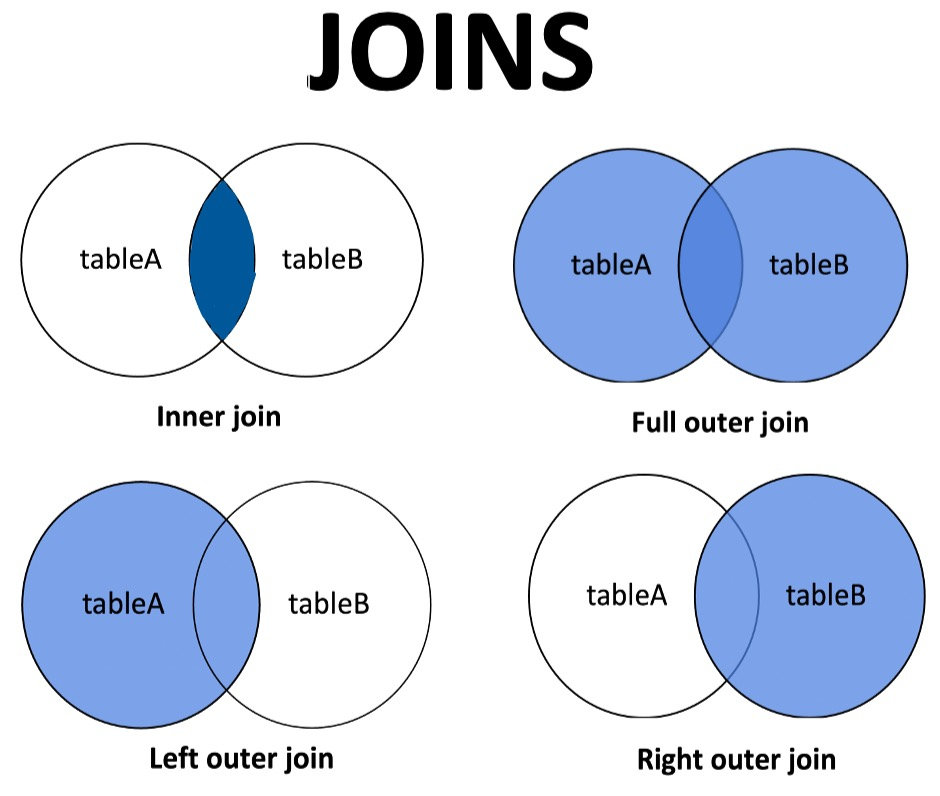
</p>



In [1040]:
# let's finally join all our data using a full outer join
relational_data <- full_join(grouped_taxonomy_and_catch, grouped_export, by = c("CommonName", "Year"))


In [1041]:
relational_data

CommonName           Year TotalReportedCatch TotalTACC
1    Alfonsino/Beryx Fish 2018 2577418            3141700  
2    Alfonsino/Beryx Fish 2018 2577418            3141700  
3    Alfonsino/Beryx Fish 2018 2577418            3141700  
4    Alfonsino/Beryx Fish 2018 2577418            3141700  
5    Alfonsino/Beryx Fish 2018 2577418            3141700  
6    Alfonsino/Beryx Fish 2018 2577418            3141700  
7    Alfonsino/Beryx Fish 2018 2577418            3141700  
8    Alfonsino/Beryx Fish 2018 2577418            3141700  
9    Alfonsino/Beryx Fish 2018 2577418            3141700  
10   Alfonsino/Beryx Fish 2018 2577418            3141700  
11   Alfonsino/Beryx Fish 2019 2379959            3141700  
12   Alfonsino/Beryx Fish 2019 2379959            3141700  
13   Alfonsino/Beryx Fish 2019 2379959            3141700  
14   Alfonsino/Beryx Fish 2019 2379959            3141700  
15   Alfonsino/Beryx Fish 2019 2379959            3141700  
16   Alfonsino/Beryx Fish 2019 2379959            3141700  
17   Alfonsino/Beryx Fish 2019 2379959            3141700  
18   Alfonsino/Beryx Fish 2019 2379959            3141700  
19   Alfonsino/Beryx Fish 2019 2379959            3141700  
20   Alfonsino/Beryx Fish 2019 2379959            3141700  
21   Alfonsino/Beryx Fish 2019 2379959            3141700  
22   Alfonsino/Beryx Fish 2020 2452989            3141700  
23   Alfonsino/Beryx Fish 2020 2452989            3141700  
24   Alfonsino/Beryx Fish 2020 2452989            3141700  
25   Alfonsino/Beryx Fish 2020 2452989            3141700  
26   Alfonsino/Beryx Fish 2020 2452989            3141700  
27   Alfonsino/Beryx Fish 2020 2452989            3141700  
28   Alfonsino/Beryx Fish 2020 2452989            3141700  
29   Alfonsino/Beryx Fish 2020 2452989            3141700  
30   Alfonsino/Beryx Fish 2020 2452989            3141700  
⋮    ⋮                    ⋮    ⋮                  ⋮        
4961 Other Mackerel Fish  2020 NA                 NA       
4962 Other Mackerel Fish  2021 NA                 NA       
4963 Other Mackerel Fish  2021 NA                 NA       
4964 Other Mackerel Fish  2021 NA                 NA       
4965 Other Mackerel Fish  2021 NA                 NA       
4966 Other Mackerel Fish  2021 NA                 NA       
4967 Other Mackerel Fish  2021 NA                 NA       
4968 Other Mackerel Fish  2021 NA                 NA       
4969 Other Mackerel Fish  2021 NA                 NA       
4970 Other Mackerel Fish  2021 NA                 NA       
4971 Other Mackerel Fish  2021 NA                 NA       
4972 Other Mackerel Fish  2021 NA                 NA       
4973 Other Mackerel Fish  2021 NA                 NA       
4974 Other Mackerel Fish  2021 NA                 NA       
4975 Other Mackerel Fish  2021 NA                 NA       
4976 Other Mackerel Fish  2021 NA                 NA       
4977 Other Mackerel Fish  2022 NA                 NA       
4978 Other Mackerel Fish  2022 NA                 NA       
4979 Other Mackerel Fish  2022 NA                 NA       
4980 Other Mackerel Fish  2022 NA                 NA       
4981 Other Mackerel Fish  2022 NA                 NA       
4982 Other Mackerel Fish  2022 NA                 NA       
4983 Other Mackerel Fish  2022 NA                 NA       
4984 Other Mackerel Fish  2022 NA                 NA       
4985 Other Mackerel Fish  2022 NA                 NA       
4986 Other Mackerel Fish  2022 NA                 NA       
4987 Other Mackerel Fish  2022 NA                 NA       
4988 Other Mackerel Fish  2022 NA                 NA       
4989 Other Mackerel Fish  2022 NA                 NA       
4990 Other Mackerel Fish  2022 NA                 NA       
     ExportCountry            TotalExportWeight TotalTotalPrice
1    Australia                  3663              27667        
2    China                    646618            5312094        
3    Fiji                       3310               3970        
4    Japan                   

## Plotting & making findings

Now we can make findings with our data.


In [770]:
# just double checking how many categories are now working with.

cat("Number of distinct Common Names in our final relational_data:", n_distinct(relational_data$CommonName), "\n")

Number of distinct Common Names in taxonomy: 89 


### 1. Analyzing the most caught species in NZ.

    1.1 In 2021, which fish was the most caught fish in NZ? As we can see, the top 3 species are Hoki, Jack Mackerel, and different kinds of Squid.

In [790]:
# Filter the data for Year 2021
filtered_data1 <- grouped_taxonomy_and_catch %>%
  filter(Year == 2021)

In [793]:
head(filtered_data1)

CommonName           Year TotalReportedCatch TotalTACC
1 Alfonsino/Beryx Fish 2021  2118100            3141700 
2 Anchovy              2021     4879             560000 
3 Barracouta           2021 21397364           33402461 
4 Billfish             2021        0                 NA 
5 Bluenose             2021   527580             630000 
6 Butterfish           2021    87951             162000

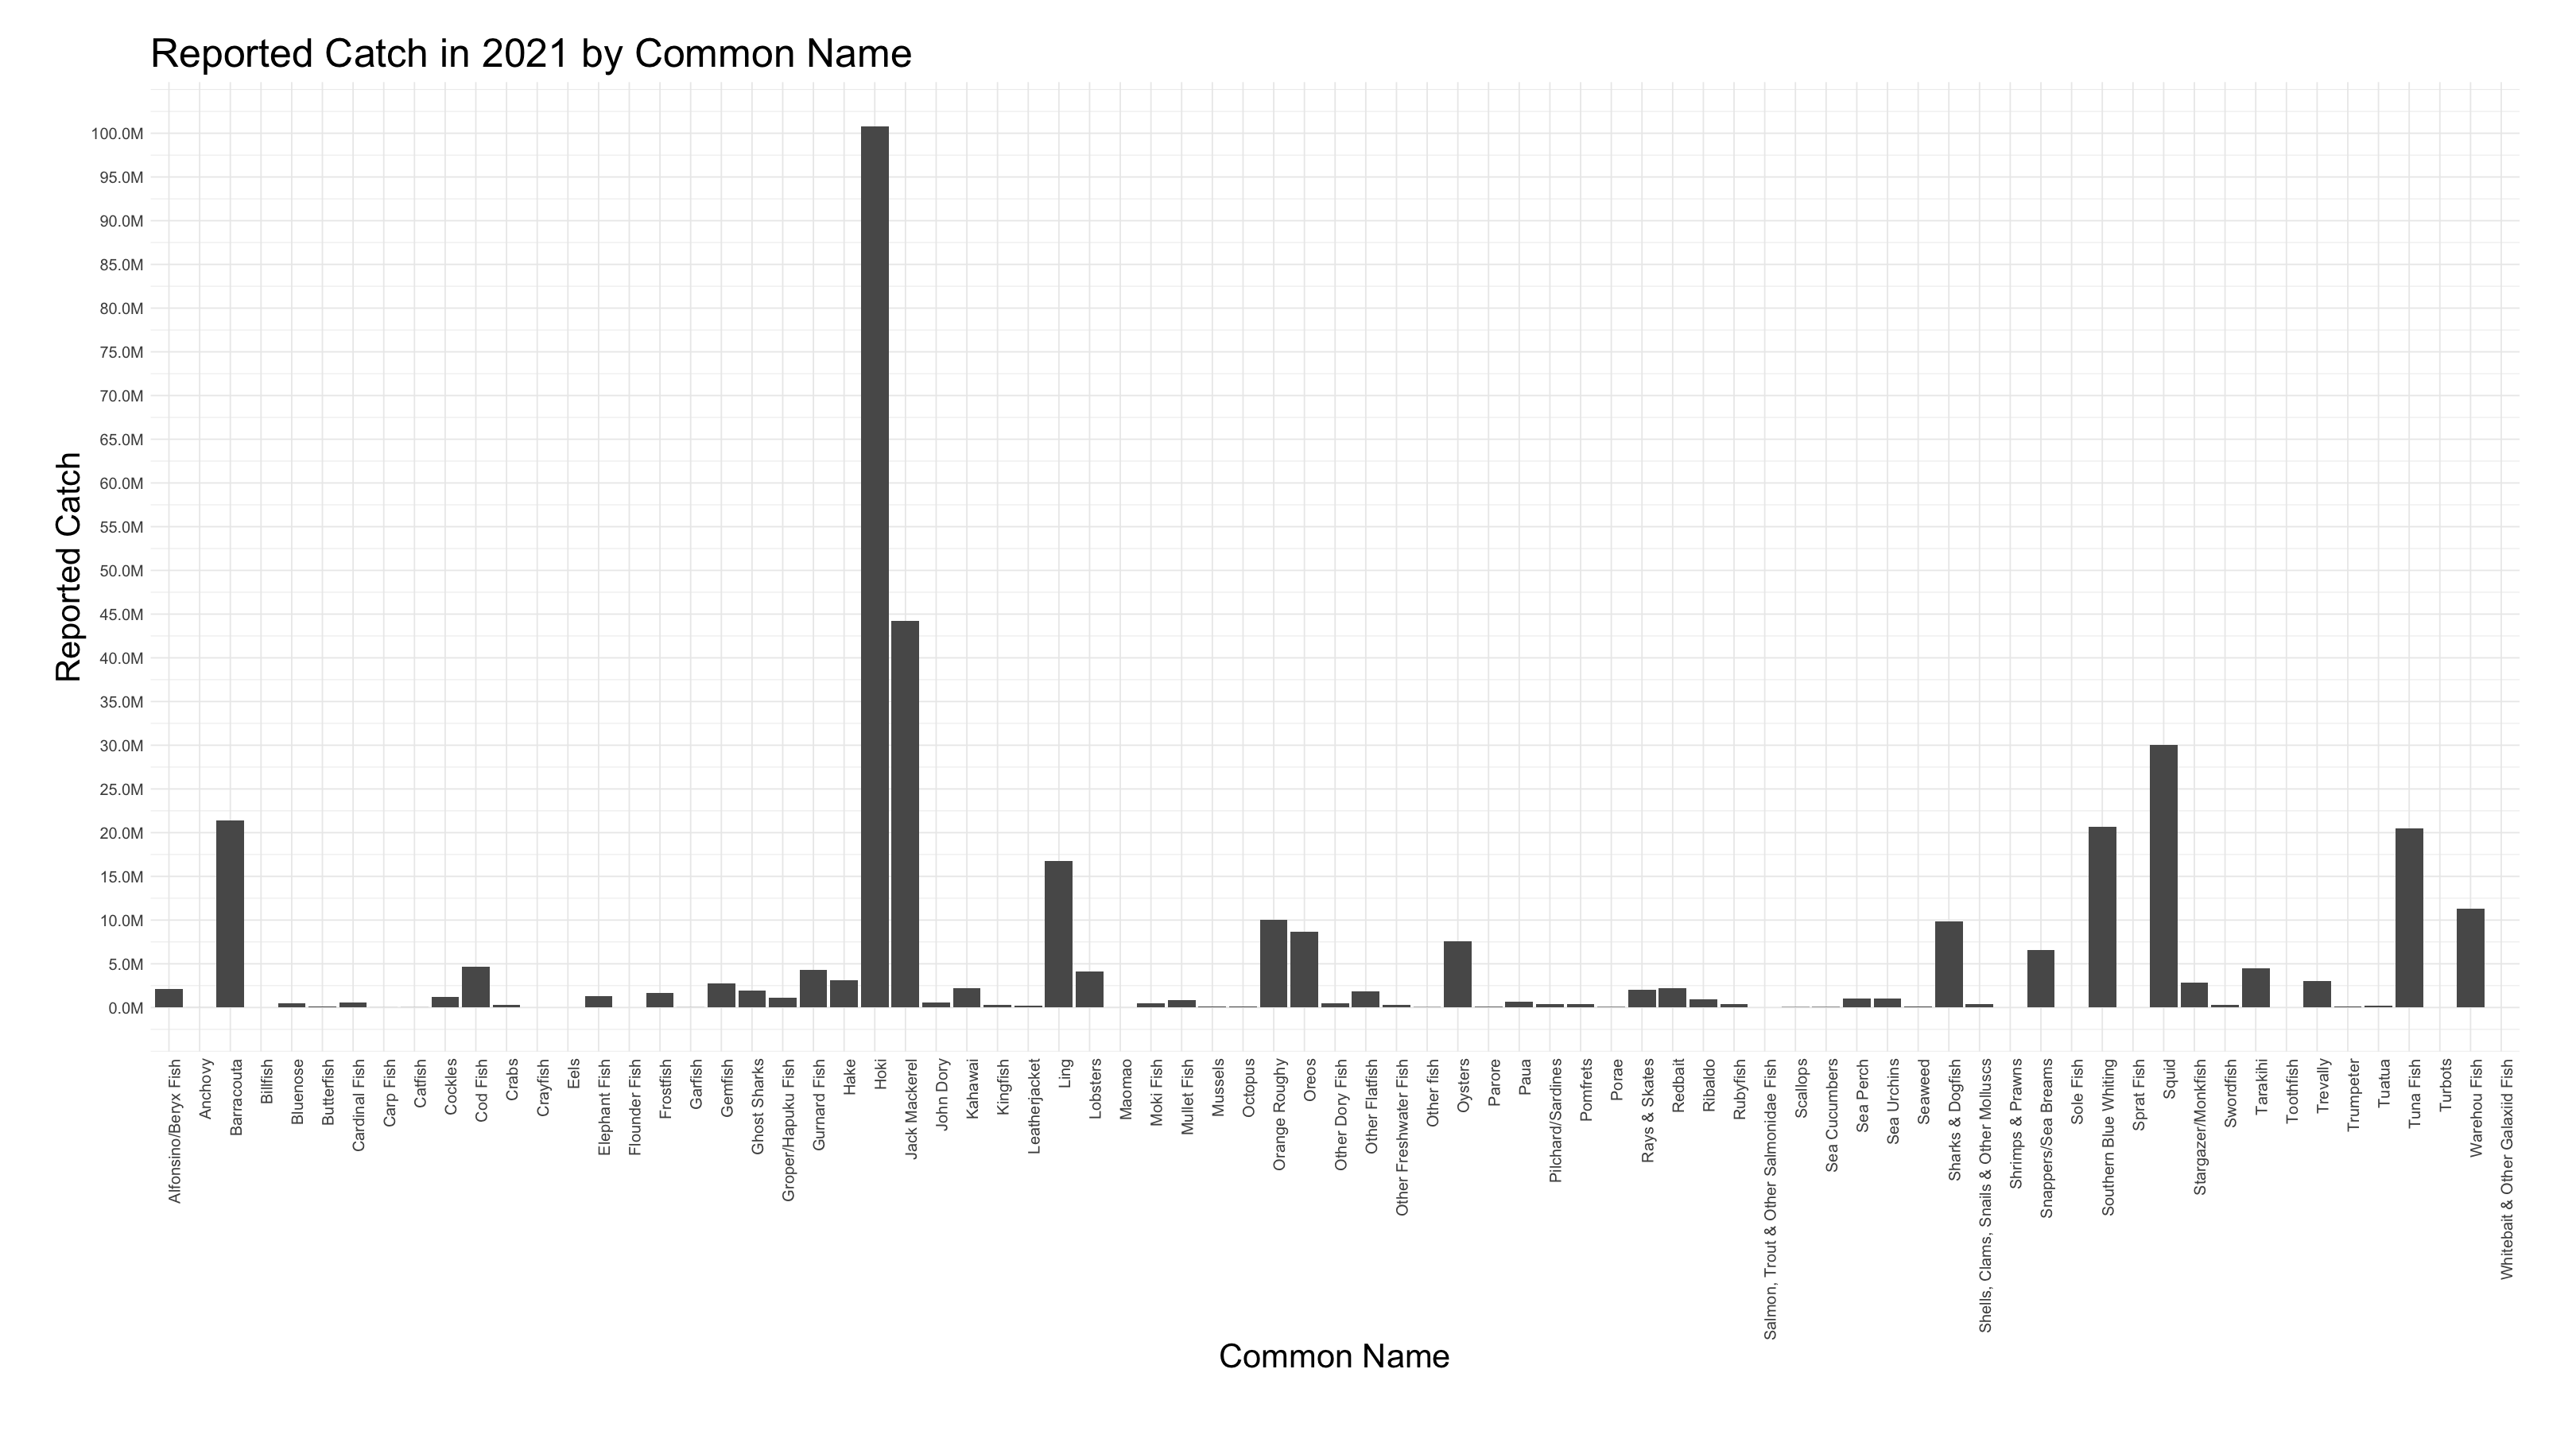

In [805]:
# PLOT 1.1

# create the bar chart with custom theme settings
ggplot(filtered_data1, aes(x = CommonName, y = TotalReportedCatch)) +
  geom_bar(stat = "identity") +
  labs(title = "Reported Catch in 2021 by Common Name", x = "Common Name", y = "Reported Catch") +
  scale_y_continuous(
      labels = scales::number_format(scale = 1e-6, accuracy = 0.10, suffix = "M"),
          breaks = seq(0, max(filtered_data$TotalReportedCatch[is.finite(filtered_data$TotalReportedCatch)]), by = 5e6)
      ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 12),  # Adjust x-axis label angle and font size
    axis.text.y = element_text(size = 12),  # Adjust y-axis font size
    axis.title.y = element_text(size = 25),  # Adjust y-axis title font size
    axis.title.x = element_text(size = 25),
    plot.title = element_text(size = 30),  # Adjust plot title font size
    plot.margin = margin(l = 1.5, r = 1.5, b = 1.5, t = 1.0, unit = "cm")  # Adjust plot margin for width and height
  )



### 2. Analyzing top export destinations from NZ.

    2.1. The top 5 export destinations from NZ are China, Australia, USA, Japan, South Africa.
    2.2. China is the top importer of Hoki.
    2.3. Top 5 importers of Hoki on a world map - China, Australia, Poland, France, Germany.

In [920]:
install.packages("geojsonio")
install.packages("sf")
library(sf)


The downloaded binary packages are in
	/var/folders/61/5gjx4xb906zf4wq9cntygmr80000gn/T//RtmpWNtiaW/downloaded_packages


In [ ]:
world <- st_read("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson")

In [1003]:
head(world)

ADMIN       ISO_A3 ISO_A2 geometry                      
1 Aruba       ABW    AW     MULTIPOLYGON (((-69.99694 1...
2 Afghanistan AFG    AF     MULTIPOLYGON (((71.0498 38....
3 Angola      AGO    AO     MULTIPOLYGON (((11.73752 -1...
4 Anguilla    AIA    AI     MULTIPOLYGON (((-63.03767 1...
5 Albania     ALB    AL     MULTIPOLYGON (((19.74777 42...
6 Aland       ALA    AX     MULTIPOLYGON (((20.92018 59...

In [1015]:
world %>% filter(grepl('(?i)united.*', ADMIN))

ADMIN                                ISO_A3 ISO_A2
1 United Arab Emirates                 ARE    AE    
2 United Kingdom                       GBR    GB    
3 United Republic of Tanzania          TZA    TZ    
4 United States Minor Outlying Islands UMI    UM    
5 United States of America             USA    US    
6 United States Virgin Islands         VIR    VI    
  geometry                      
1 MULTIPOLYGON (((53.86305 24...
2 MULTIPOLYGON (((-6.287506 4...
3 MULTIPOLYGON (((39.74916 -8...
4 MULTIPOLYGON (((-160.0124 -...
5 MULTIPOLYGON (((-155.6065 2...
6 MULTIPOLYGON (((-64.73078 1...

In [1042]:
# over all years, for all species

world_export <- grouped_export %>%
              group_by(ExportCountry) %>%
              summarize(TotalExportWeight = sum(TotalExportWeight)) %>%
                arrange(desc(TotalExportWeight))

head(world_export, 10)

ExportCountry            TotalExportWeight
1  China                    326186166        
2  Australia                121308900        
3  United States of America  89939067        
4  Japan                     50668106        
5  South Africa              49708964        
6  Spain                     42454887        
7  Cameroon                  42101426        
8  Poland                    32008748        
9  Thailand                  31777028        
10 Vietnam                   23403510

In [1044]:
world_world_export <- left_join(world, world_export, by = c("ADMIN" = "ExportCountry"))

head(world_world_export)

ADMIN       ISO_A3 ISO_A2 TotalExportWeight geometry                      
1 Aruba       ABW    AW          NA           MULTIPOLYGON (((-69.99694 1...
2 Afghanistan AFG    AF          NA           MULTIPOLYGON (((71.0498 38....
3 Angola      AGO    AO     1881021           MULTIPOLYGON (((11.73752 -1...
4 Anguilla    AIA    AI          NA           MULTIPOLYGON (((-63.03767 1...
5 Albania     ALB    AL      148428           MULTIPOLYGON (((19.74777 42...
6 Aland       ALA    AX          NA           MULTIPOLYGON (((20.92018 59...

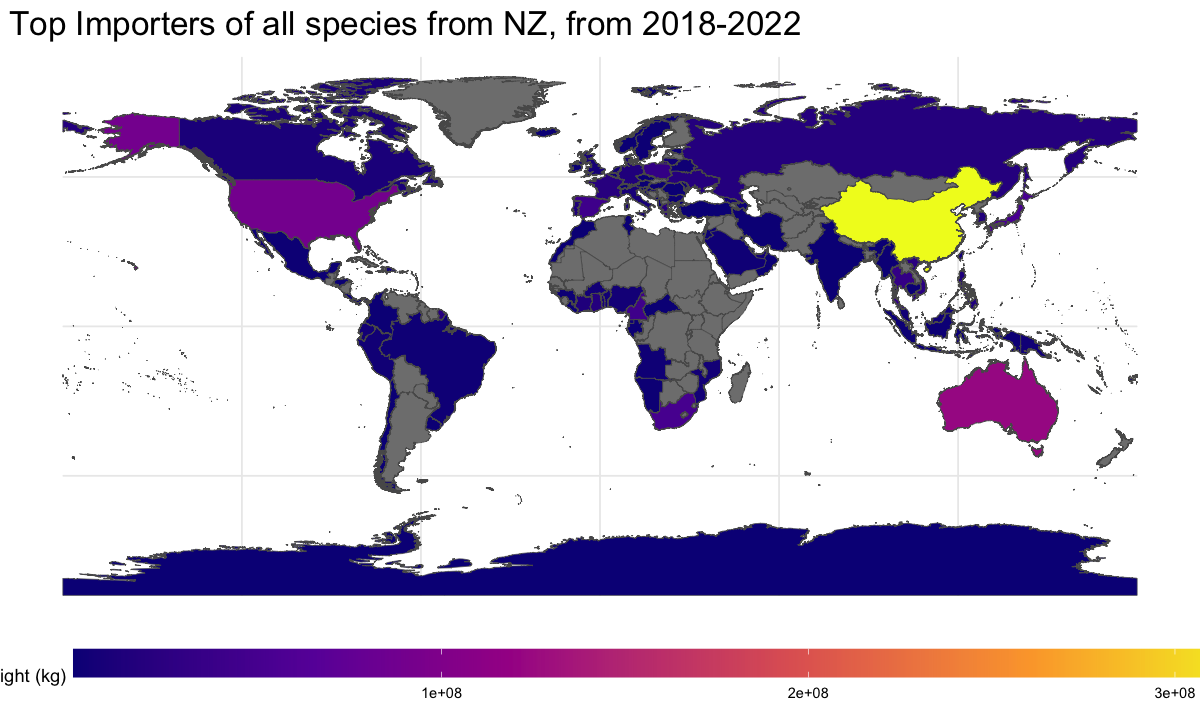

In [1045]:
# PLOT 2.1

ggplot(data = world_world_export) +
  geom_sf(aes(fill = TotalExportWeight)) +
  scale_fill_viridis_c(name = "Total Weight (kg)", option = "C") +
  labs(title = "Top Importers of all species from NZ, from 2018-2022") +
  theme_minimal() +
  theme(legend.position = "bottom",
        legend.key.width = unit(2, "inch"),
        plot.title = element_text(size = 20)) 


In [950]:
# over all years, for hoki

hoki_data <- grouped_export %>%
  filter(`CommonName` == "Hoki") %>%
              group_by(ExportCountry) %>%
              summarize(TotalExportWeight = sum(TotalExportWeight)) %>%
                arrange(desc(TotalExportWeight))

In [951]:
head(hoki_data)

ExportCountry TotalExportWeight
1 China         79448886         
2 Australia     40074804         
3 Poland        31503936         
4 France        14123600         
5 Germany       10954167         
6 Japan         10143913

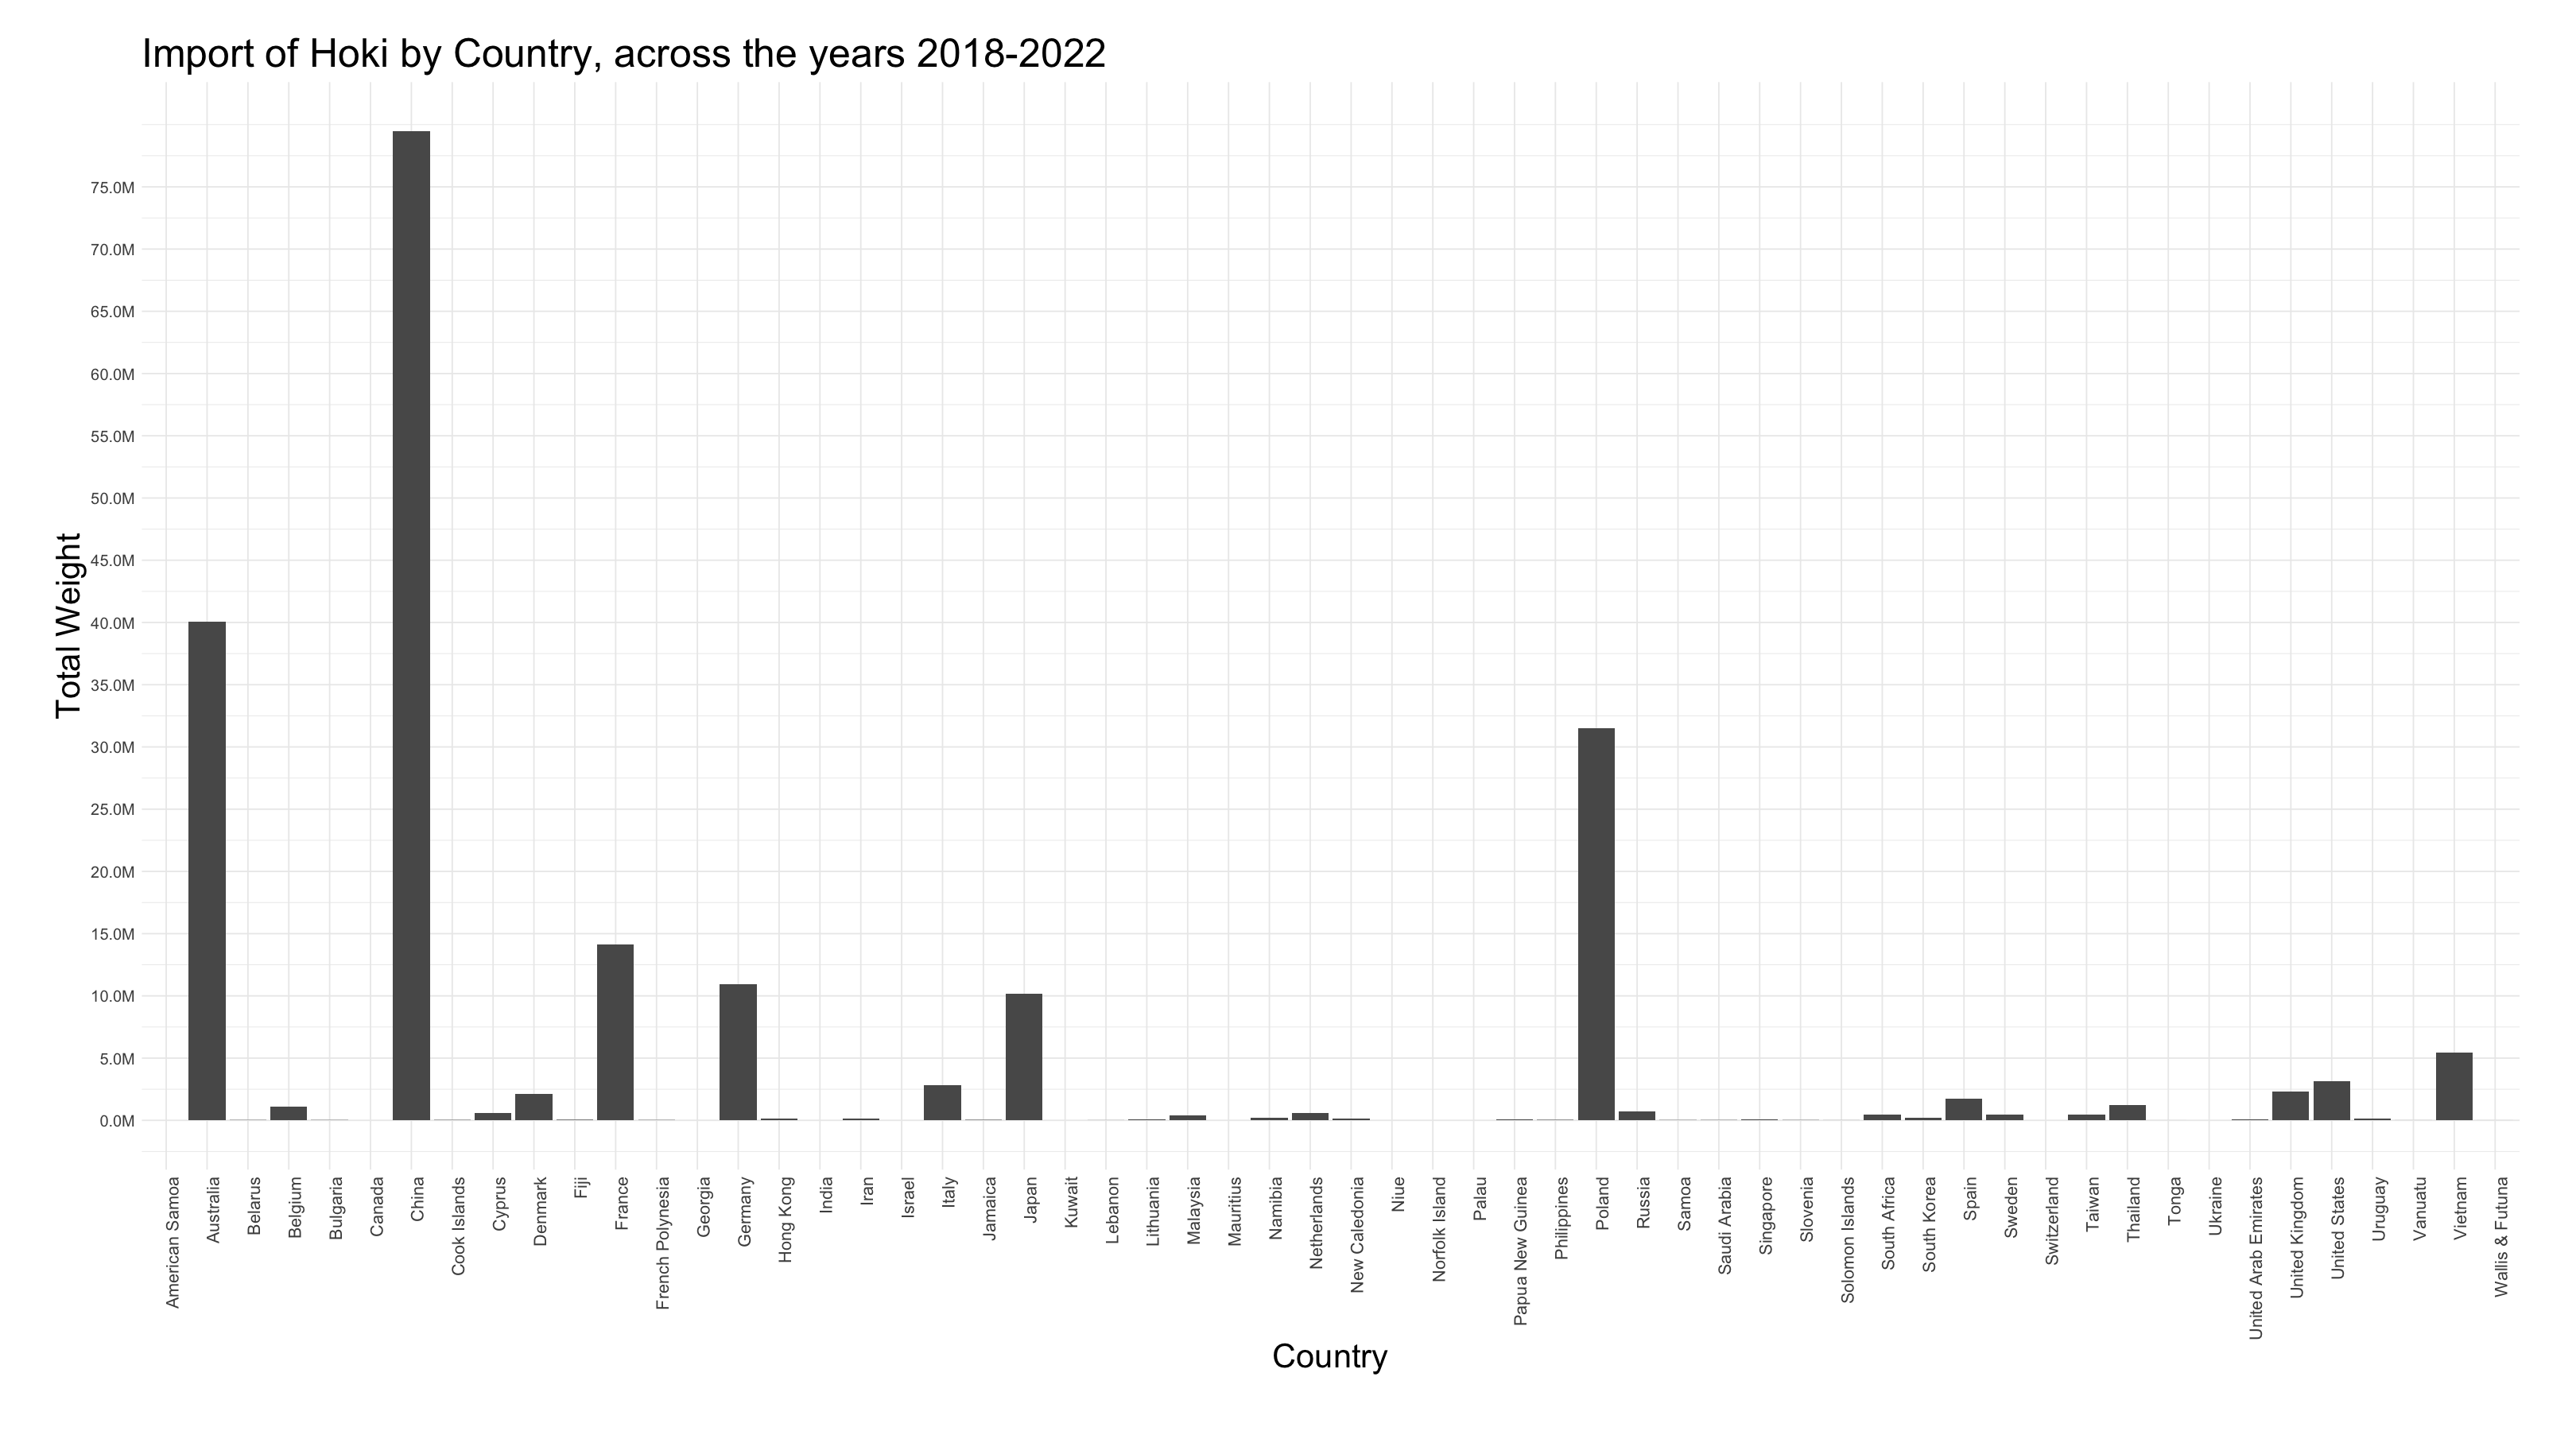

In [910]:
# PLOT 2.2

# create the bar chart with custom theme settings
ggplot(hoki_data, aes(x = ExportCountry, y = TotalExportWeight)) +
  geom_bar(stat = "identity") +
  labs(title = "Import of Hoki by Country, across the years 2018-2022", x = "Country", y = "Total Weight") +
  scale_y_continuous(
      labels = scales::number_format(scale = 1e-6, accuracy = 0.10, suffix = "M"),
          breaks = seq(0, max(hoki_data$TotalExportWeight[is.finite(hoki_data$TotalExportWeight)]), by = 5e6)
      ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 13),  # Adjust x-axis label angle and font size
    axis.text.y = element_text(size = 12),  # Adjust y-axis font size
    axis.title.y = element_text(size = 25),  # Adjust y-axis title font size
    axis.title.x = element_text(size = 25),
    plot.title = element_text(size = 30),  # Adjust plot title font size
    plot.margin = margin(l = 1.5, r = 1.5, b = 1.5, t = 1.0, unit = "cm")  # Adjust plot margin for width and height
  )



In [963]:
world_hoki_data <- left_join(world, hoki_data, by = c("ADMIN" = "ExportCountry"))

In [964]:
head(world_hoki_data,10)

ADMIN                ISO_A3 ISO_A2 TotalExportWeight
1  Aruba                ABW    AW        NA            
2  Afghanistan          AFG    AF        NA            
3  Angola               AGO    AO        NA            
4  Anguilla             AIA    AI        NA            
5  Albania              ALB    AL        NA            
6  Aland                ALA    AX        NA            
7  Andorra              AND    AD        NA            
8  United Arab Emirates ARE    AE     91512            
9  Argentina            ARG    AR        NA            
10 Armenia              ARM    AM        NA            
   geometry                      
1  MULTIPOLYGON (((-69.99694 1...
2  MULTIPOLYGON (((71.0498 38....
3  MULTIPOLYGON (((11.73752 -1...
4  MULTIPOLYGON (((-63.03767 1...
5  MULTIPOLYGON (((19.74777 42...
6  MULTIPOLYGON (((20.92018 59...
7  MULTIPOLYGON (((1.707006 42...
8  MULTIPOLYGON (((53.86305 24...
9  MULTIPOLYGON (((-68.65412 -...
10 MULTIPOLYGON (((45.54717 40...

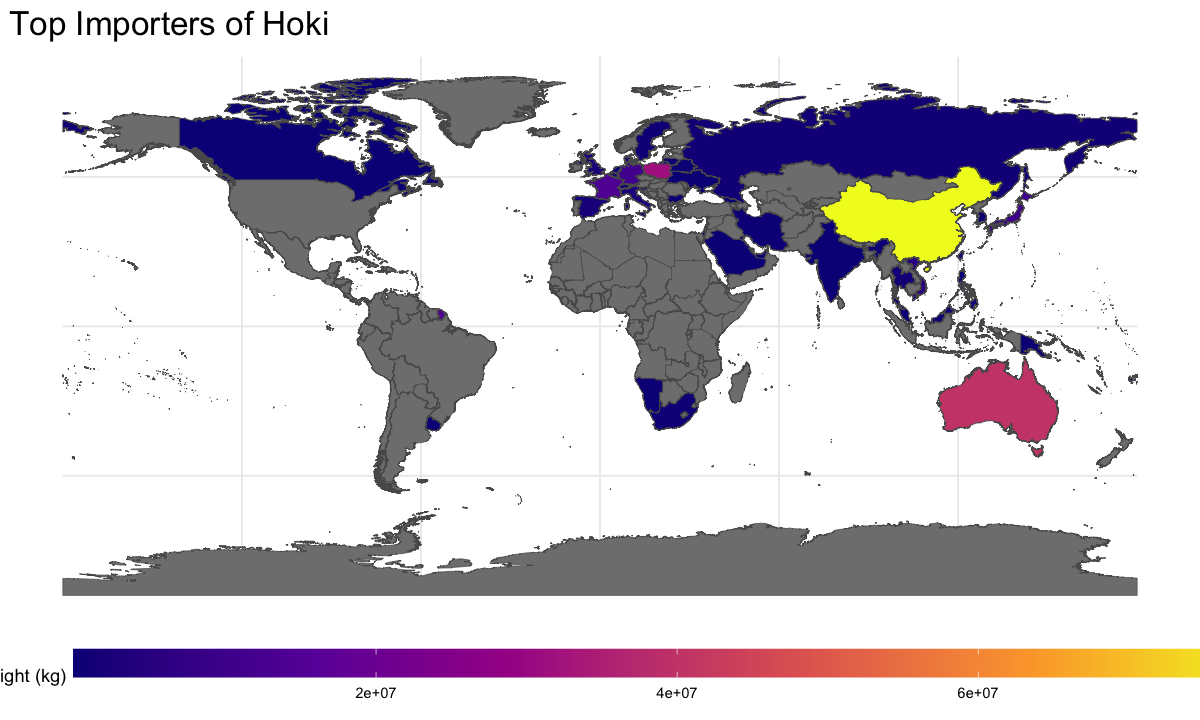

In [980]:
# PLOT 2.3.

ggplot(data = world_hoki_data) +
  geom_sf(aes(fill = TotalExportWeight)) +
  scale_fill_viridis_c(name = "Total Weight (kg)", option = "C") +
  labs(title = "Top Importers of Hoki") +
  theme_minimal() +
  theme(legend.position = "bottom",
        legend.key.width = unit(2, "inch"),
        plot.title = element_text(size = 20)) 


### 3. Analyzing trends over time.

3.1. The first plot shows us that the average price of fish products has not changed much over the years.
3.2. The total price of Leatherjacket has increased significantly since 2020 with decreased catch which could indicate that these were exported more at a higher price. 

Warning message:
“Removed 266 rows containing non-finite values (`stat_boxplot()`).”


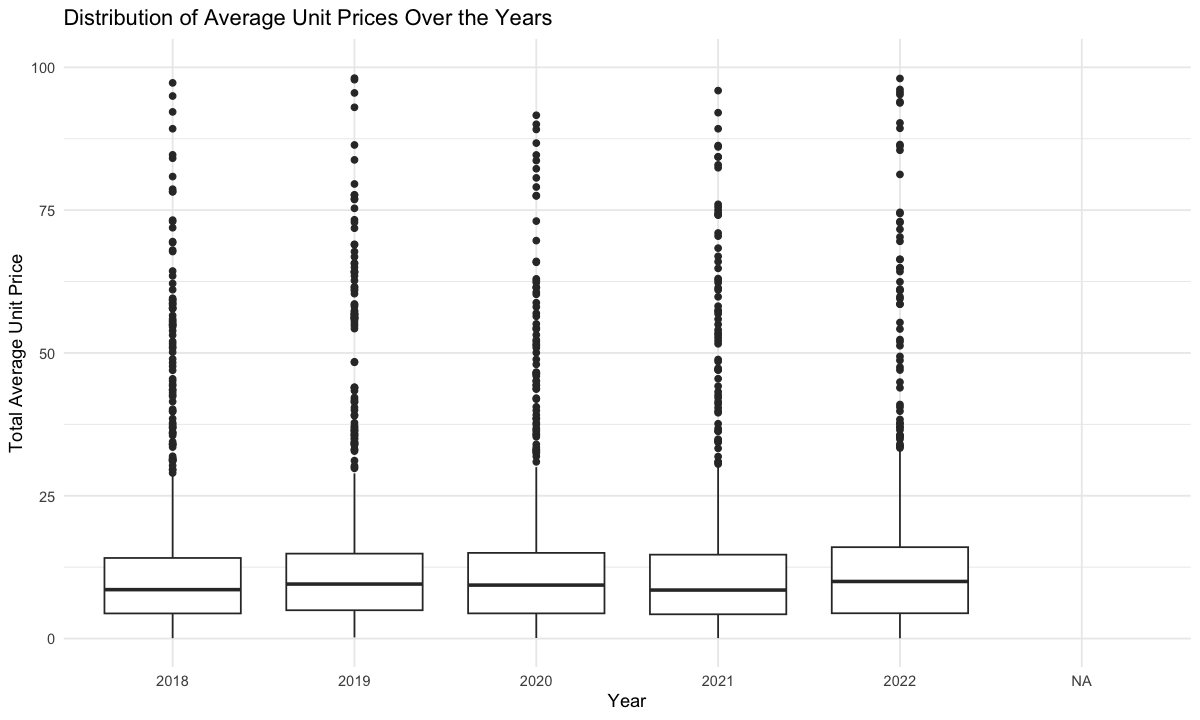

In [977]:
# PLOT 3.1

# Create a boxplot to show the distribution of average unit prices
ggplot(data = relational_data, aes(x = Year, y = TotalAvgUnitPrice)) +
  geom_boxplot() +
  labs(title = "Distribution of Average Unit Prices Over the Years", x = "Year", y = "Total Average Unit Price") +
  theme_minimal()+
  ylim(0,100)


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


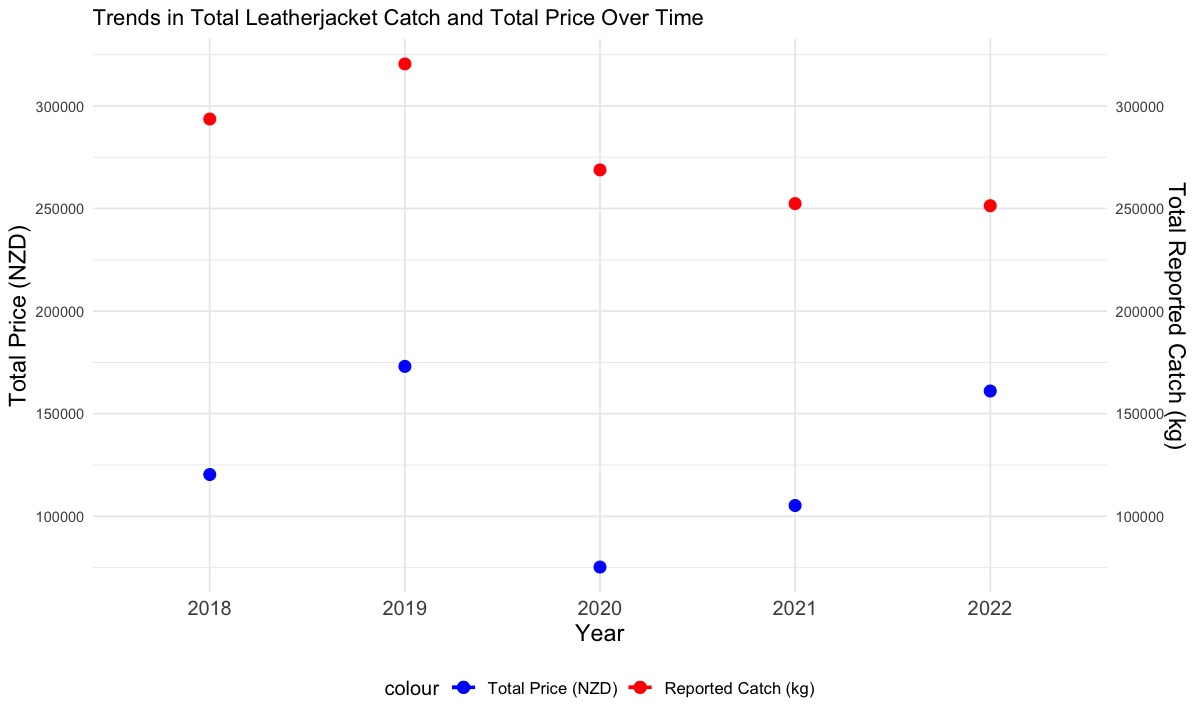

In [1055]:
# PLOT 3.2

# Filtering for leatherjacket from the relational_data
leatherjacket_data <- relational_data %>% 
             filter(CommonName == "Leatherjacket") %>%
             group_by(Year) %>%
             summarise(TotalReportedCatch = mean(TotalReportedCatch),  
                       TotalTotalPrice = mean(TotalTotalPrice))


# Plotting
ggplot(leatherjacket_data, aes(x = Year)) +
  geom_line(aes(y = TotalTotalPrice, color = "Total Price (NZD)"), size = 1) +
  geom_point(aes(y = TotalTotalPrice, color = "Total Price (NZD)"), size = 3) +
  geom_line(aes(y = TotalReportedCatch, color = "Total Reported Catch (kg)"), size = 1, linetype = "dashed") +
  geom_point(aes(y = TotalReportedCatch, color = "Total Reported Catch (kg)"), size = 3) +
  scale_y_continuous(name = "Total Price (NZD)", sec.axis = sec_axis(~., name = "Total Reported Catch (kg)")) +
      labs(title = "Trends in Total Leatherjacket Catch and Total Price Over Time", 
       x = "Year") +
  theme_minimal() +
  theme(axis.title.x = element_text(size = 14),
        axis.title.y.left = element_text(size = 14),
        axis.title.y.right = element_text(size = 14),
        axis.text.x = element_text(size = 12),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10),
        legend.position = "bottom") +
  scale_color_manual(values = c("Total Price (NZD)" = "blue", "Total Reported Catch (kg)" = "red"),
                     labels = c("Total Price (NZD)", "Reported Catch (kg)"))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


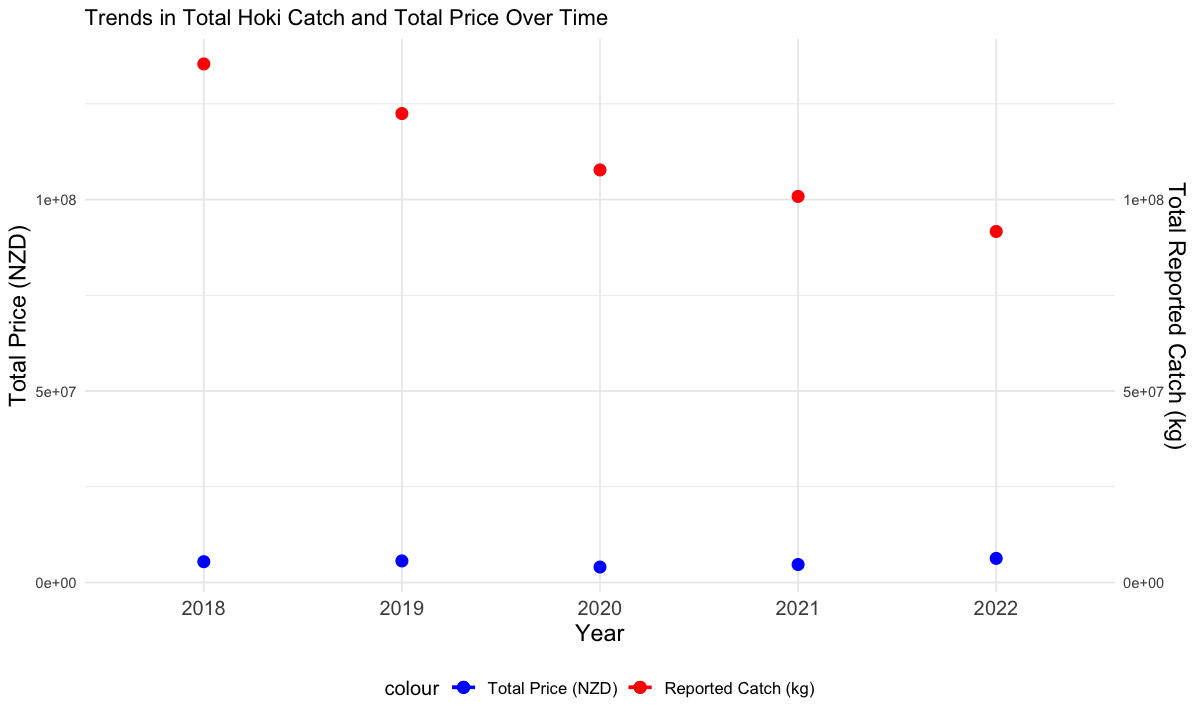

In [1056]:
# Filtering for Hoki from the relational_data
hoki_data <- relational_data %>% 
             filter(CommonName == "Hoki") %>%
             group_by(Year) %>%
             summarise(TotalReportedCatch = mean(TotalReportedCatch),  
                       TotalTotalPrice = mean(TotalTotalPrice))

# Plotting
ggplot(hoki_data, aes(x = Year)) +
  geom_line(aes(y = TotalTotalPrice, color = "Total Price (NZD)"), size = 1) +
  geom_point(aes(y = TotalTotalPrice, color = "Total Price (NZD)"), size = 3) +
  geom_line(aes(y = TotalReportedCatch, color = "Total Reported Catch (kg)"), size = 1, linetype = "dashed") +
  geom_point(aes(y = TotalReportedCatch, color = "Total Reported Catch (kg)"), size = 3) +
  scale_y_continuous(name = "Total Price (NZD)", sec.axis = sec_axis(~., name = "Total Reported Catch (kg)")) +
  labs(title = "Trends in Total Hoki Catch and Total Price Over Time", 
       x = "Year") +
  theme_minimal() +
  theme(axis.title.x = element_text(size = 14),
        axis.title.y.left = element_text(size = 14),
        axis.title.y.right = element_text(size = 14),
        axis.text.x = element_text(size = 12),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10),
        legend.position = "bottom") +
  scale_color_manual(values = c("Total Price (NZD)" = "blue", "Total Reported Catch (kg)" = "red"),
                     labels = c("Total Price (NZD)", "Reported Catch (kg)"))


### 4. Analyzing ReportedCatch vs TACC

We want to check if some species were overfished or not?

The fishing of Bluenose seems to have decreased.
Gemfish is clearly overfished.

Adding missing grouping variables: `CommonName`
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


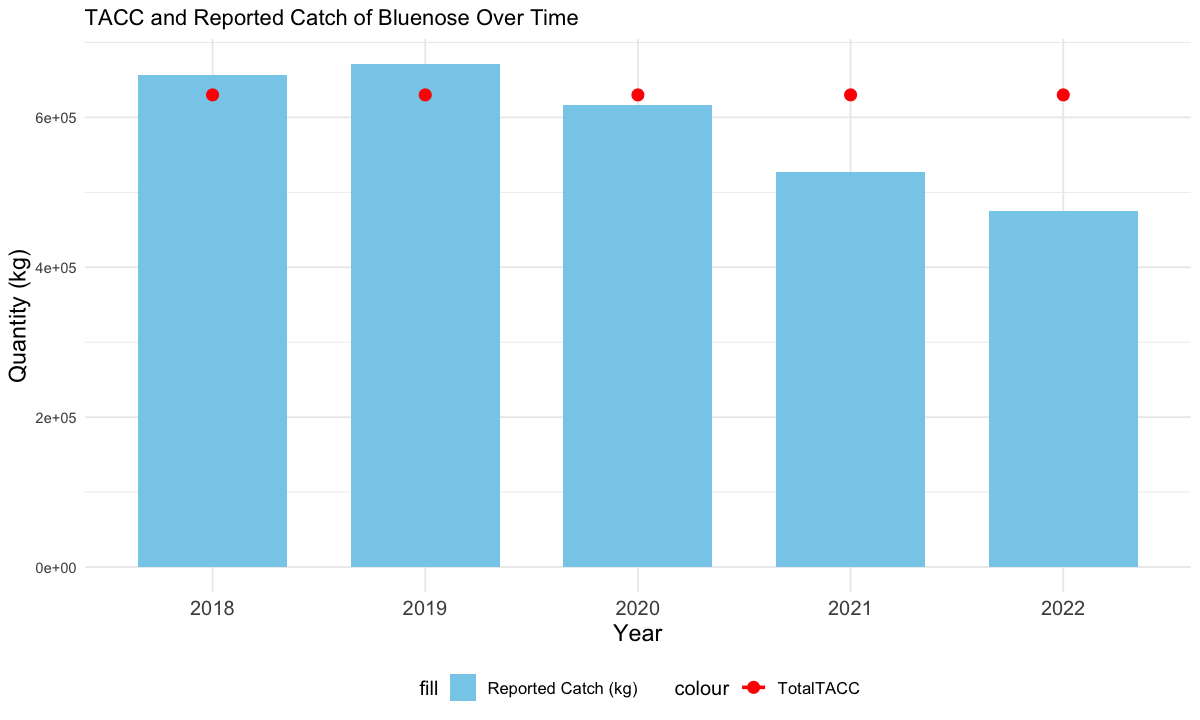

In [1049]:
# Filtering for bluenose from the relational_data
bluenose_data <- relational_data %>% 
             filter(CommonName == "Bluenose") %>%
             select(Year, TotalReportedCatch, TotalTACC) %>%
             distinct()


# Plotting
p <- ggplot(bluenose_data, aes(x = Year)) +
  geom_col(aes(y = TotalReportedCatch, fill = "Reported Catch (kg)"), width = 0.7) + 
  geom_line(aes(y = TotalTACC, color = "TotalTACC"), size = 1) +
  geom_point(aes(y = TotalTACC, color = "TotalTACC"), size = 3) +
  labs(title = "TACC and Reported Catch of Bluenose Over Time", 
       x = "Year",
       y = "Quantity (kg)") +
  theme_minimal() +
  theme(axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x = element_text(size = 12),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10),
        legend.position = "bottom") +
  scale_color_manual(values = c("TotalTACC" = "red"),
                     labels = c("TotalTACC")) +
  scale_fill_manual(values = c("Reported Catch (kg)" = "skyblue"),
                    labels = c("Reported Catch (kg)"))

p

In [1051]:
species_with_lower_tacc <- relational_data %>%
  group_by(CommonName, Year) %>%
  summarise(TotalTACC = first(TotalTACC), TotalReportedCatch = first(TotalReportedCatch)) %>%
  filter(TotalTACC < TotalReportedCatch) %>%
  arrange(CommonName, Year)

print(species_with_lower_tacc)

`summarise()` has grouped output by 'CommonName'. You can override using the
`.groups` argument.


# A tibble: 14 × 4
# Groups:   CommonName [6]
   CommonName          Year  TotalTACC TotalReportedCatch
   <chr>               <fct>     <dbl>              <dbl>
 1 Bluenose            2018     630000             656384
 2 Bluenose            2019     630000             671313
 3 Elephant Fish       2018    1313500            1345905
 4 Gemfish             2018    1060394            1612095
 5 Gemfish             2019    1060394            2195719
 6 Gemfish             2020    1658000            2120104
 7 Gemfish             2021    1748000            2727547
 8 Kingfish            2018     217000             255280
 9 Kingfish            2019     222000             316549
10 Kingfish            2020     222000             309274
11 Lobsters            2021    4143086            4166205
12 Snappers/Sea Breams 2018    6407300            6490740
13 Snappers/Sea Breams 2020    6407300            6426701
14 Snappers/Sea Breams 2021    6507300            6531535


Adding missing grouping variables: `CommonName`
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


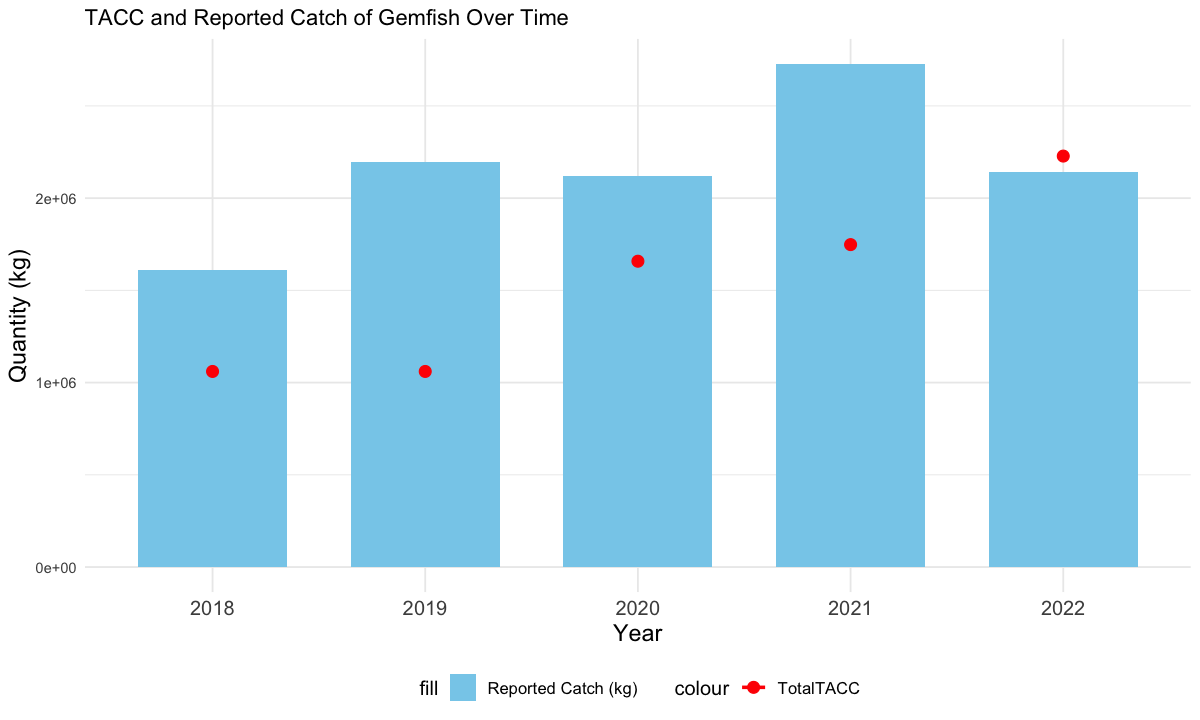

In [1053]:
#looking at gemfish

gemfish_data <- relational_data %>% 
             filter(CommonName == "Gemfish") %>%
             select(Year, TotalReportedCatch, TotalTACC) %>%
             distinct()
# Plotting
ggplot(gemfish_data, aes(x = Year)) +
  geom_col(aes(y = TotalReportedCatch, fill = "Reported Catch (kg)"), width = 0.7) + 
  geom_line(aes(y = TotalTACC, color = "TotalTACC"), size = 1) +
  geom_point(aes(y = TotalTACC, color = "TotalTACC"), size = 3) +
  labs(title = "TACC and Reported Catch of Gemfish Over Time", 
       x = "Year",
       y = "Quantity (kg)") +
  theme_minimal() +
  theme(axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x = element_text(size = 12),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10),
        legend.position = "bottom") +
  scale_color_manual(values = c("TotalTACC" = "red"),
                     labels = c("TotalTACC")) +
  scale_fill_manual(values = c("Reported Catch (kg)" = "skyblue"),
                    labels = c("Reported Catch (kg)"))